# The Fission MC
fissionMC now runs (after finding several problems along the way!)

We load it into our current notebook, and can now use it like any other class.  

Note that because the fi

In [3]:
from fissionMC import Neutron,Geometry, Material,geo
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure',dpi=250)


Now we run the monte carlo 100 times to look at the output.

In [4]:
n=Neutron()

for run in range(1,100):
    n.TrackNeutrons(10000)
    print('Neutrons in chain:',Neutron.nChain)

mother: t= 8.7,t0= 0.0,e= 0.80 MeV escape
Neutrons in chain: 0
mother: t= 9.5,t0= 0.0,e= 1.44 MeV escape
Neutrons in chain: 0
mother: t=26.6,t0= 0.0,e= 0.13 MeV escape
Neutrons in chain: 0
mother: t= 4.1,t0= 0.0,e= 3.96 MeV escape
Neutrons in chain: 0
mother: t= 5.7,t0= 0.0,e= 3.88 MeV escape
Neutrons in chain: 0
mother: t= 5.2,t0= 0.0,e= 0.61 MeV escape
Neutrons in chain: 0
mother: t= 0.9,t0= 0.0,e= 1.83 MeV escape
Neutrons in chain: 0
mother: t= 0.1,t0= 0.0,e= 2.98 MeV escape
Neutrons in chain: 0
mother: t= 3.8,t0= 0.0,e= 2.22 MeV escape
Neutrons in chain: 0
mother: t= 2.1,t0= 0.0,e= 0.99 MeV escape
Neutrons in chain: 0
mother: t= 0.3,t0= 0.0,e= 2.65 MeV escape
Neutrons in chain: 0
mother: t= 0.8,t0= 0.0,e= 1.27 MeV escape
Neutrons in chain: 0
mother: t= 1.7,t0= 0.0,e= 4.50 MeV escape
Neutrons in chain: 0
mother: t= 3.0,t0= 0.0,e= 1.51 MeV escape
Neutrons in chain: 0
mother: t= 7.3,t0= 0.0,e= 2.94 MeV [ 5.11  0.89  5.59]
daughter t= 9.5,t0= 7.3,e= 5.11 MeV escape
daughter t=17.6,t0= 

## Validation:  geometry code

To validate the geometry, lets make a histogram of the position of the starting points of the first mother neutron, the position where the neutrons leave the sphere, and the position of the fissions.  

For uniform distributions (like the starting point and the exit position) we should have uniform $\cos \theta$, $\phi$, $r^{1/3}$.  





In [5]:
import numpy as np


def spherical(x):
    '''conversion from Cartesian to Spherical coordinates.  Why is it not already in numpy?''' 
    r=np.linalg.norm(x)
    ct=x[2]/r
    phi=np.arctan2(x[1],x[0])
    return (r,ct,phi)

exitPositions=[] # where neutrons leave the sphere
startPositions=[] #where mothers are generated
fissionPositions=[] #where fissions occur

Neutron.output=False #turn off print statements
for run in range(1,1000):
    n.TrackNeutrons(10000)
    startPositions.append(spherical(Neutron.firstNeutronStartPosition))
    for i in range (0,Neutron.numberOfBins):
        for j in range(0,len(Neutron.list[i])):
            d=Neutron.list[i][j].nDaughters
            if 'escape' in d:
                exitPositions.append(spherical(Neutron.list[i][j].position))
            else:
                fissionPositions.append(spherical(Neutron.list[i][j].position))

#now we convert the lists into np arrays with rows corresponding to r, ctheta,phi
startPositions=np.array(startPositions).transpose()
exitPositions=np.array(exitPositions).transpose()
fissionPositions=np.array(fissionPositions).transpose()



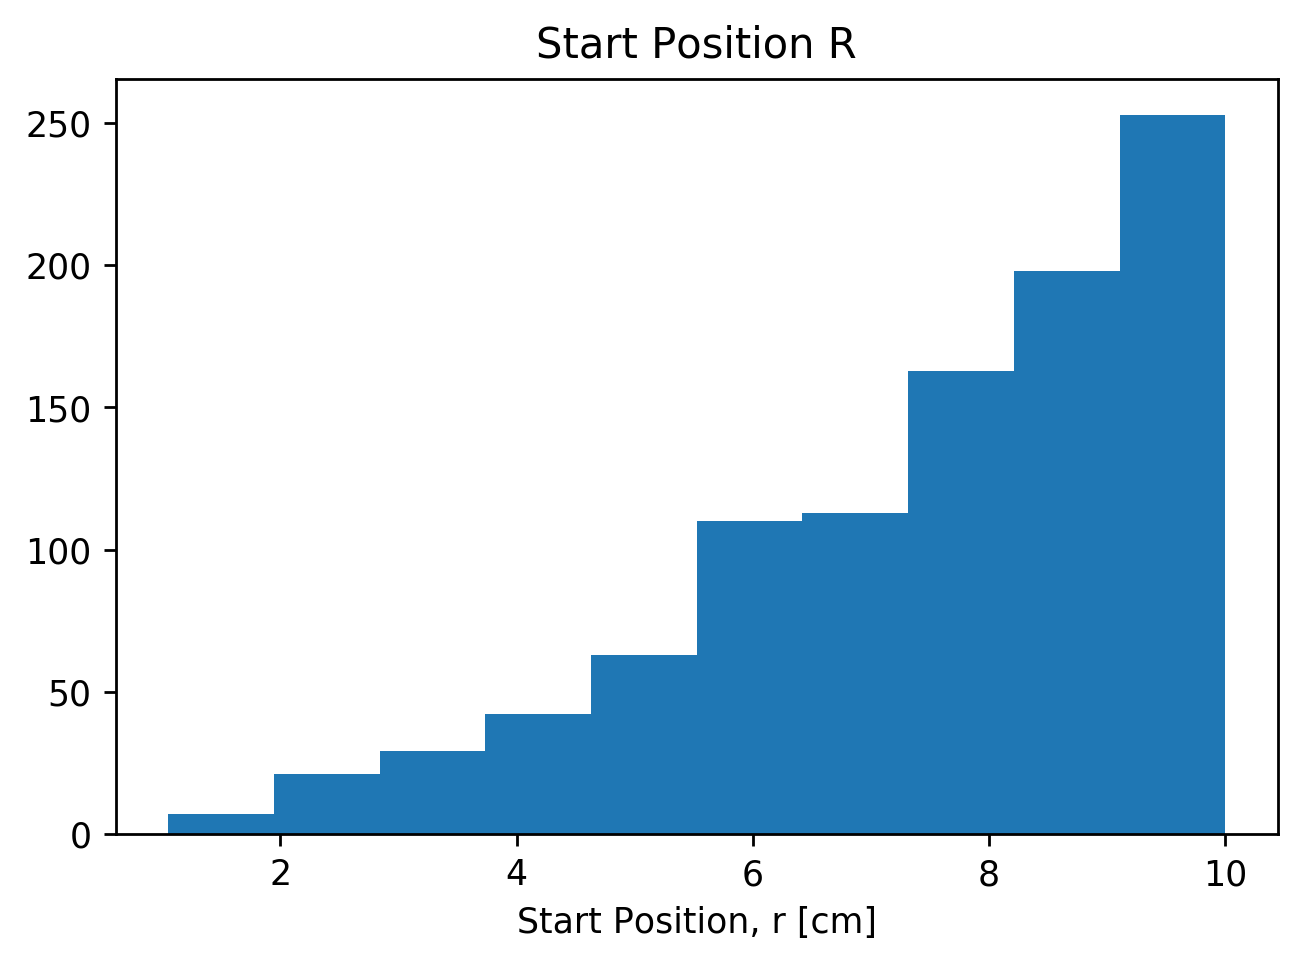

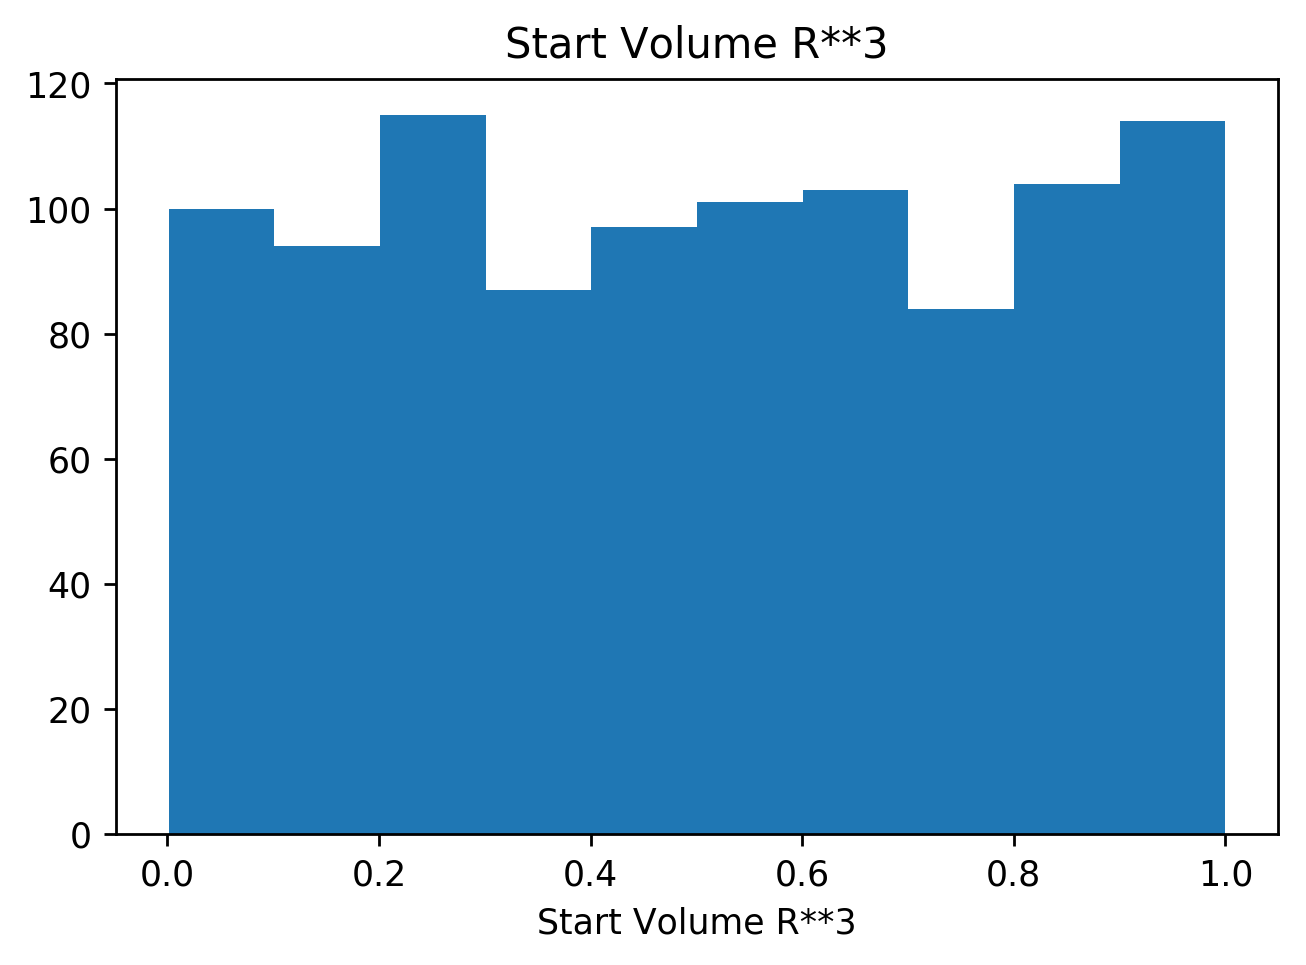

In [6]:

plt.figure()
plt.hist(startPositions[0])
plt.title('Start Position R')
plt.xlabel('Start Position, r [cm]')

plt.figure()
r=plt.hist((startPositions[0]/geo.radius)**(3))
plt.title('Start Volume R**3')
plt.xlabel('Start Volume R**3')

radius [ 100.   94.  115.   87.   97.  101.  103.   84.  104.  114.] 99.9 9.57548954362 9.99499874937
cos theta [  91.   97.   92.  102.   89.  104.  106.  107.  109.  102.] 99.9 6.81835757349 9.99499874937
phi [  98.   89.  107.  102.   79.   98.  103.  124.  100.   99.] 99.9 10.9949988631 9.99499874937
cp [[  9.   5.  16.   8.   6.  12.  12.   8.  10.   5.]
 [ 16.   7.   8.  16.   6.   8.   8.   8.  10.  10.]
 [  8.   5.  12.  10.   8.   7.  10.  11.   7.  14.]
 [ 11.  10.  12.   9.   3.  12.  12.  11.   8.  14.]
 [  7.   7.   9.   7.   7.  13.   9.  13.   9.   8.]
 [  8.  13.   8.   7.   8.  15.  15.   9.   8.  13.]
 [ 11.   7.  10.  10.   8.   7.   9.  19.  13.  12.]
 [  9.   9.  11.   9.  14.   5.   7.  18.  16.   9.]
 [ 12.  17.  11.  10.   6.  13.  12.  12.   7.   9.]
 [  7.   9.  10.  16.  13.   6.   9.  15.  12.   5.]] 9.99 3.22333678042 3.16069612586


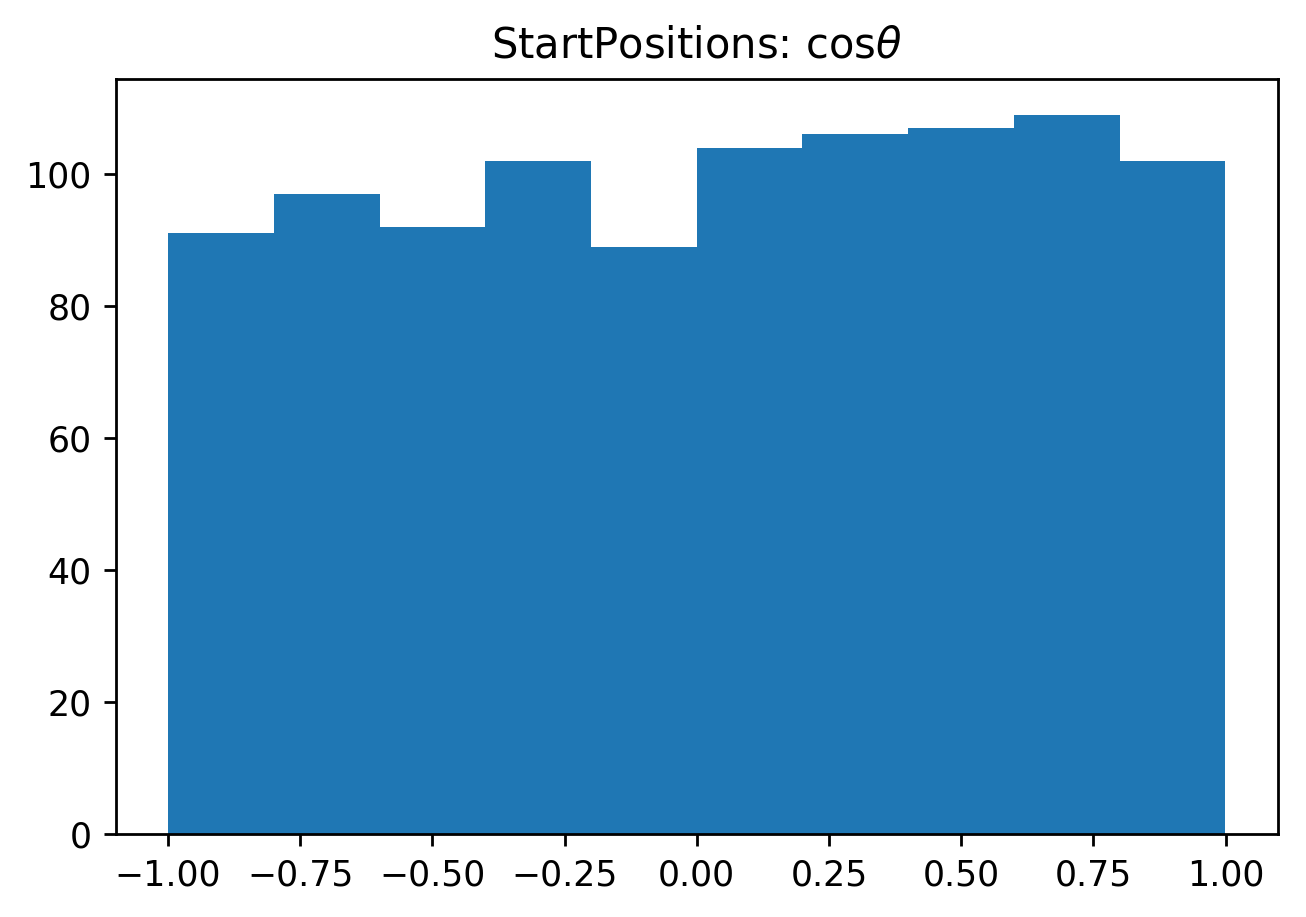

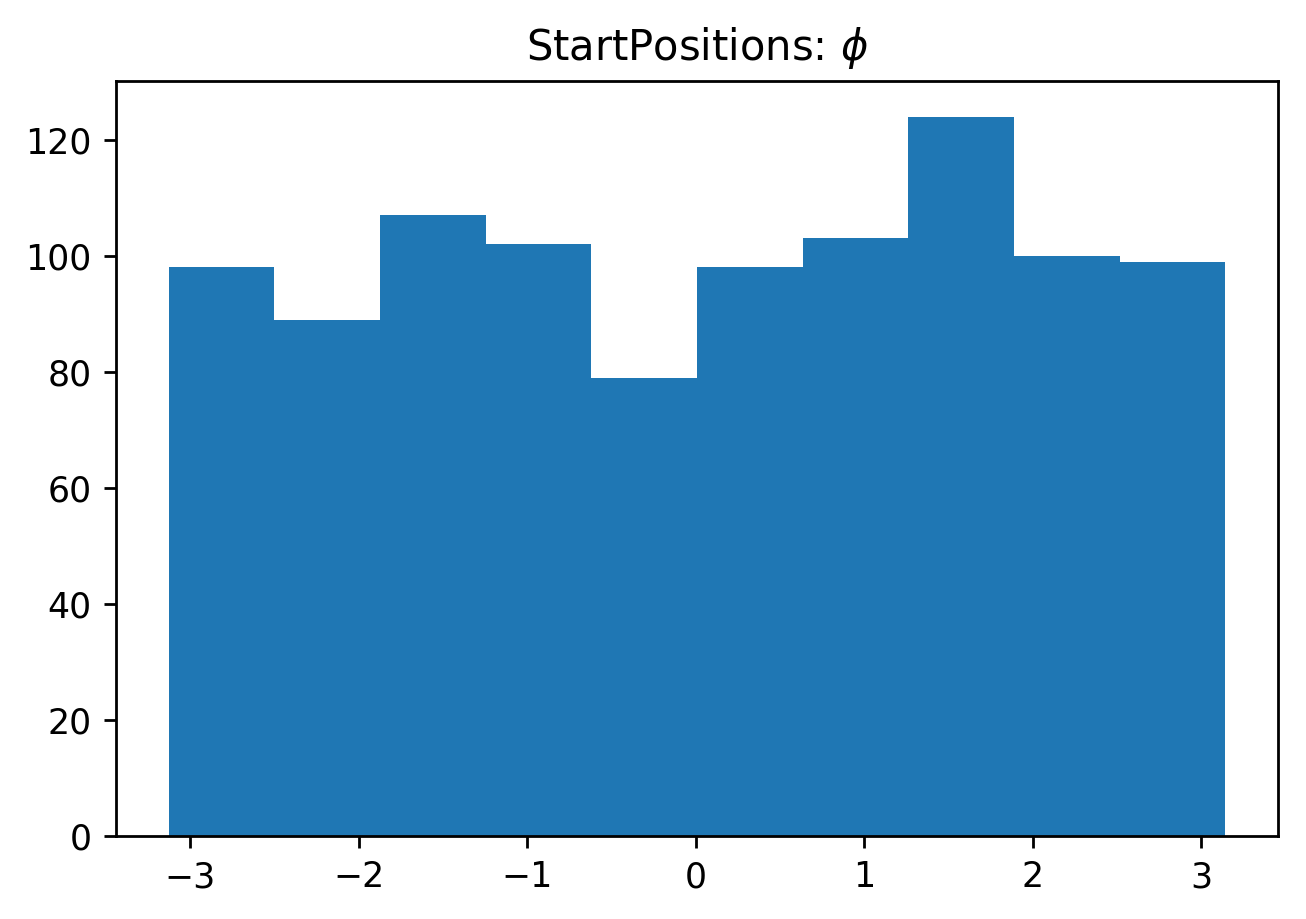

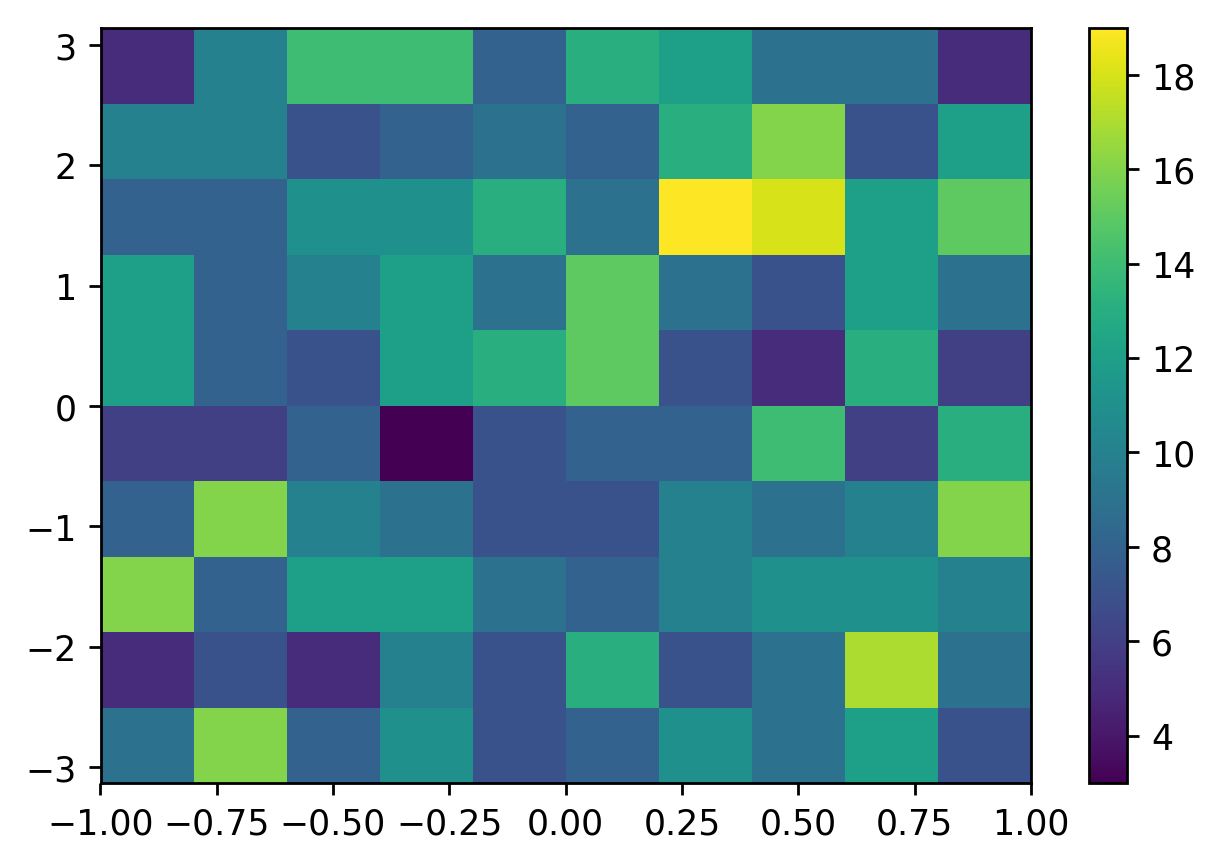

In [8]:
plt.figure()
c=plt.hist(startPositions[1])
plt.title(r'StartPositions: $\cos\theta$')
plt.figure()
p=plt.hist(startPositions[2])
plt.title(r'StartPositions: $\phi$')
plt.figure()
cp=plt.hist2d(startPositions[1],startPositions[2])
plt.colorbar()

print('radius',r[0],np.mean(r[0]),np.std(r[0]),np.sqrt(np.mean(r[0])))
print('cos theta',c[0],np.mean(c[0]),np.std(c[0]),np.sqrt(np.mean(c[0])))
print ('phi',p[0],np.mean(p[0]),np.std(p[0]),np.sqrt(np.mean(p[0])))
print('cp',cp[0],np.mean(cp[0]),np.std(cp[0]),np.sqrt(np.mean(cp[0])))

In [9]:
geo.radius

10

radius [    0.     0.     0.     0.   597.  8283.     0.     0.     0.     0.]
cos theta [ 468.  474.  423.  413.  400.  439.  433.  451.  459.  417.  406.  461.
  415.  423.  458.  465.  442.  454.  490.  489.] 444.0 26.3248931622 21.0713075057
phi [ 436.  444.  439.  439.  436.  448.  486.  446.  471.  428.  428.  470.
  441.  406.  452.  462.  447.  436.  440.  425.] [ 436.  444.  439.  439.  436.  448.  486.  446.  471.  428.  428.  470.
  441.  406.  452.  462.  447.  436.  440.  425.] 444.0 17.5641680703 21.0713075057
cp [[ 100.   83.   88.  100.   91.   95.   86.  101.  100.   98.]
 [  85.   81.   94.   78.   74.   84.   73.  101.   90.   76.]
 [  84.   89.   83.   87.   85.   82.   89.   91.   75.   74.]
 [  89.   85.   93.  102.   99.   89.   80.   91.   82.   74.]
 [  90.   88.   78.   90.   96.   91.   78.   92.   81.   92.]
 [  89.   93.   80.   89.   85.   83.   84.   77.   94.   93.]
 [  89.   79.   98.   82.   93.   90.   72.   85.   72.   78.]
 [  91.   99.   84.   95. 

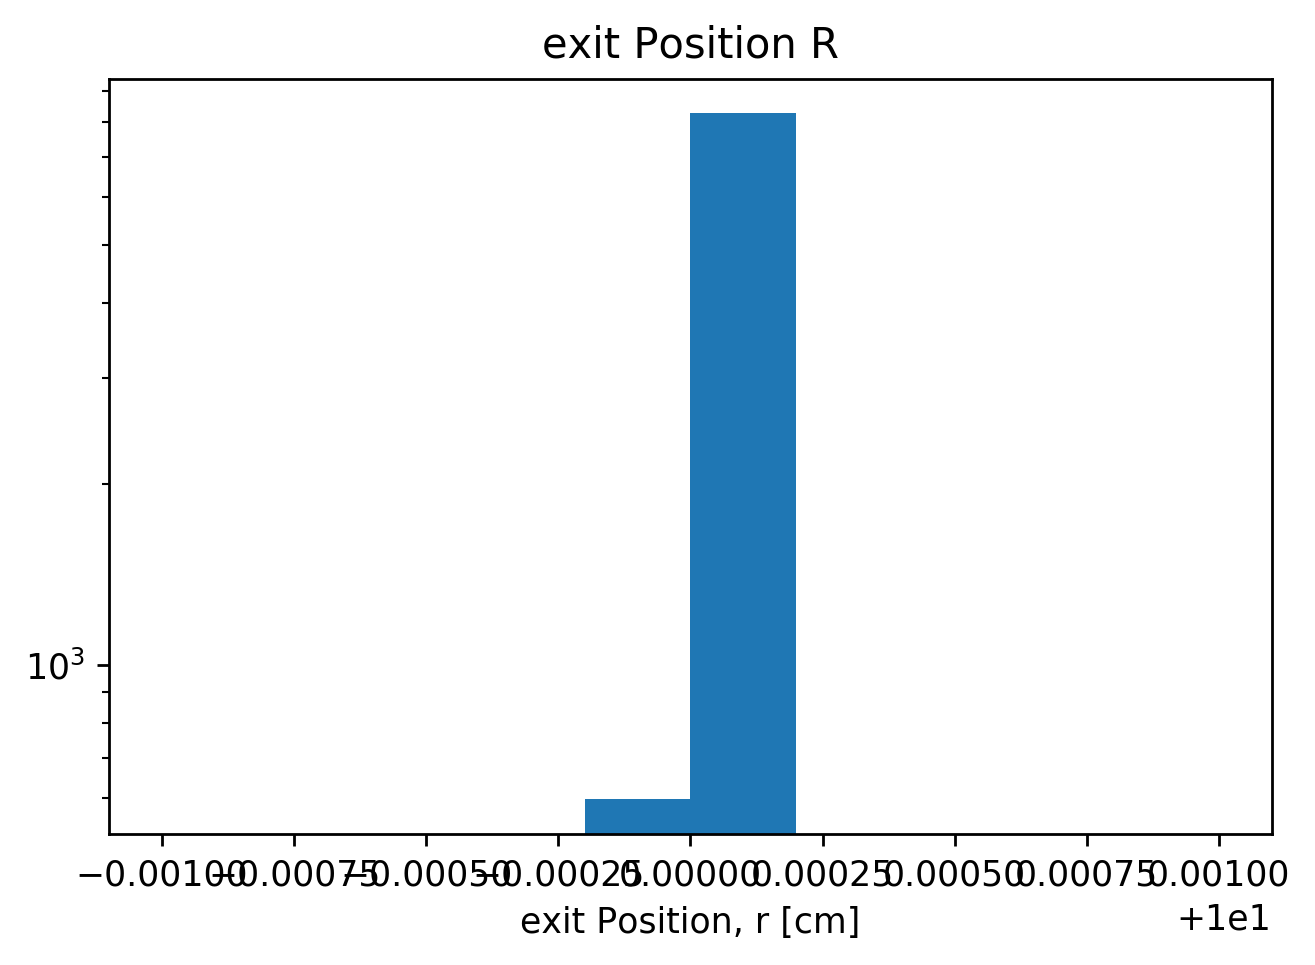

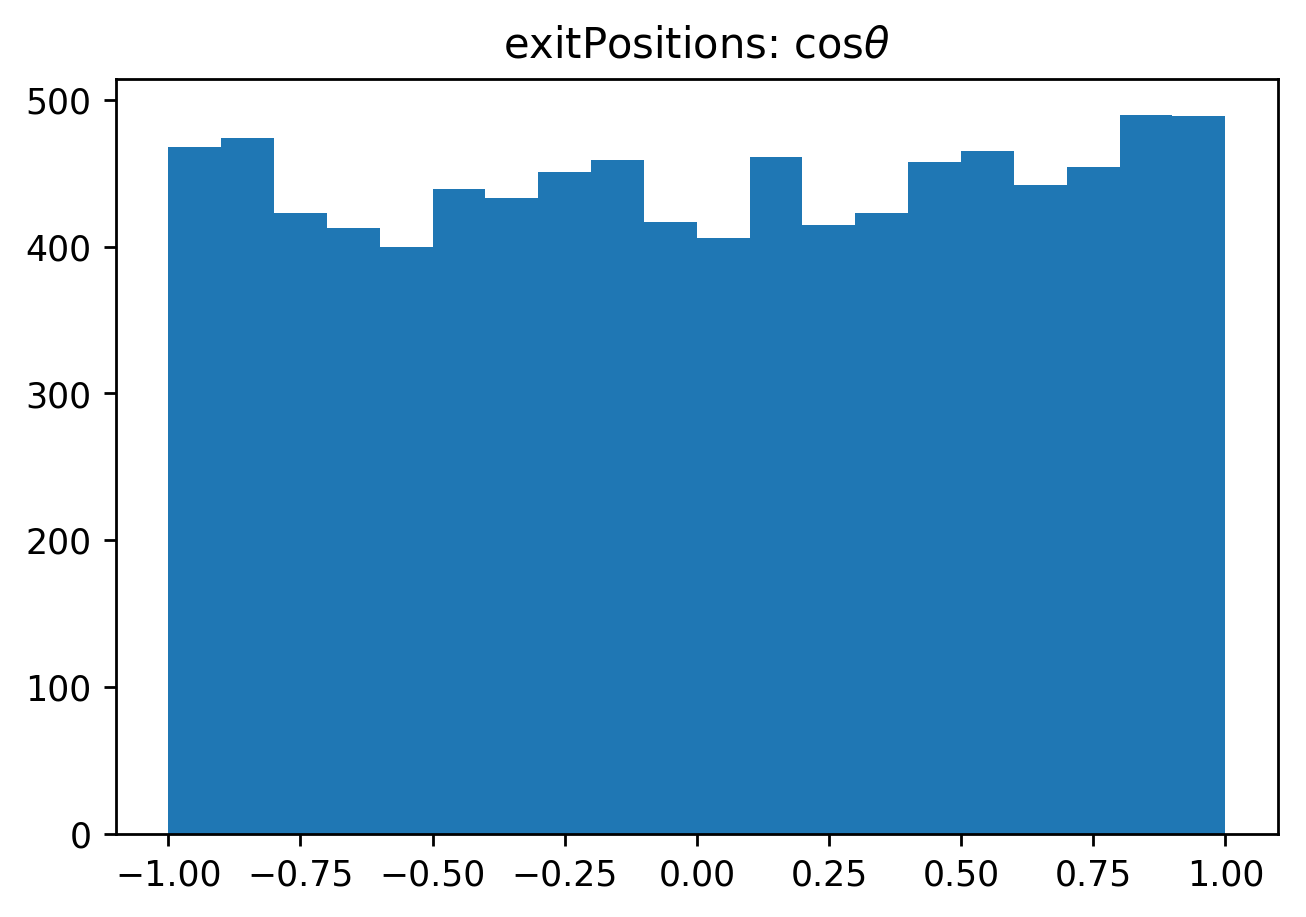

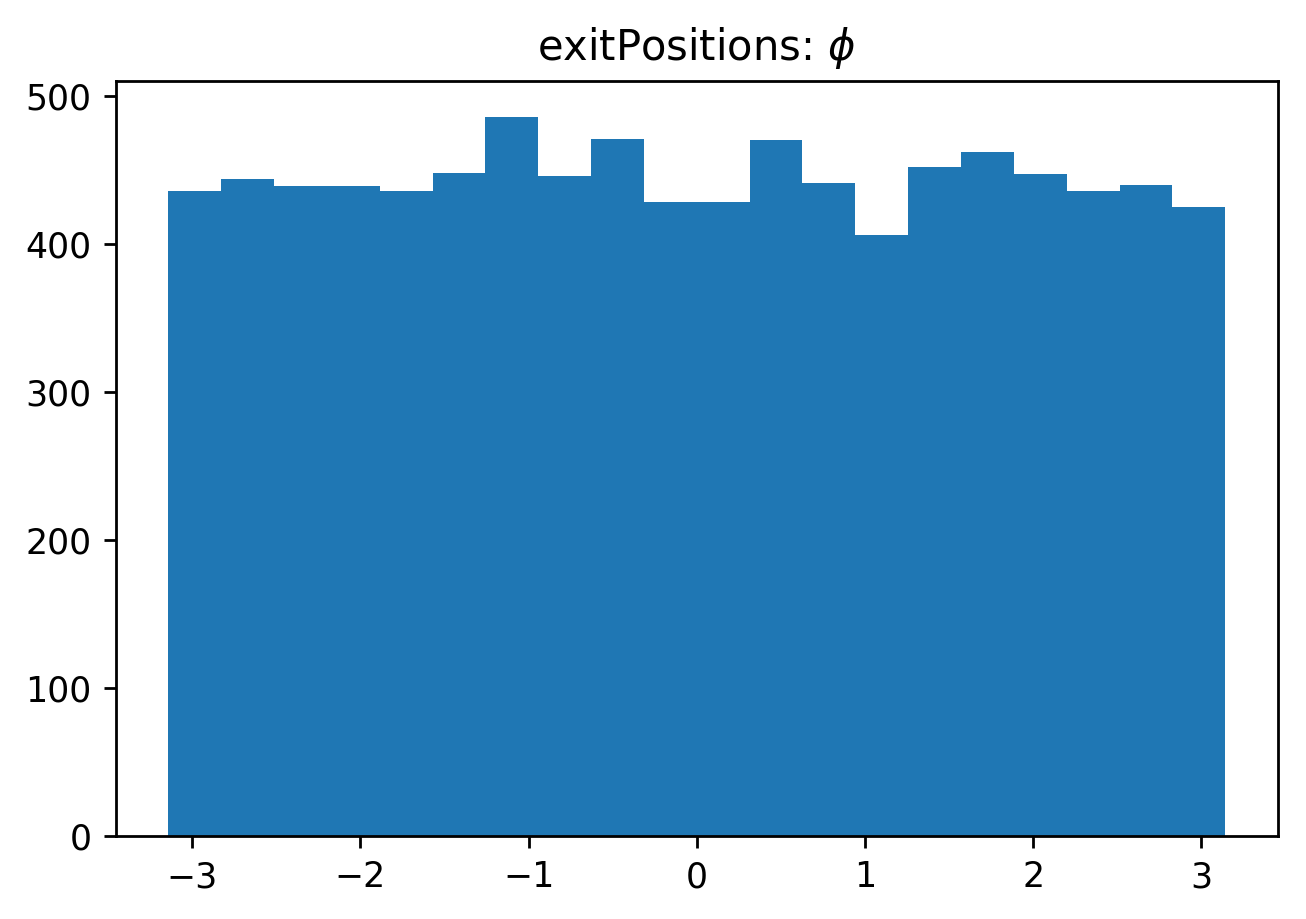

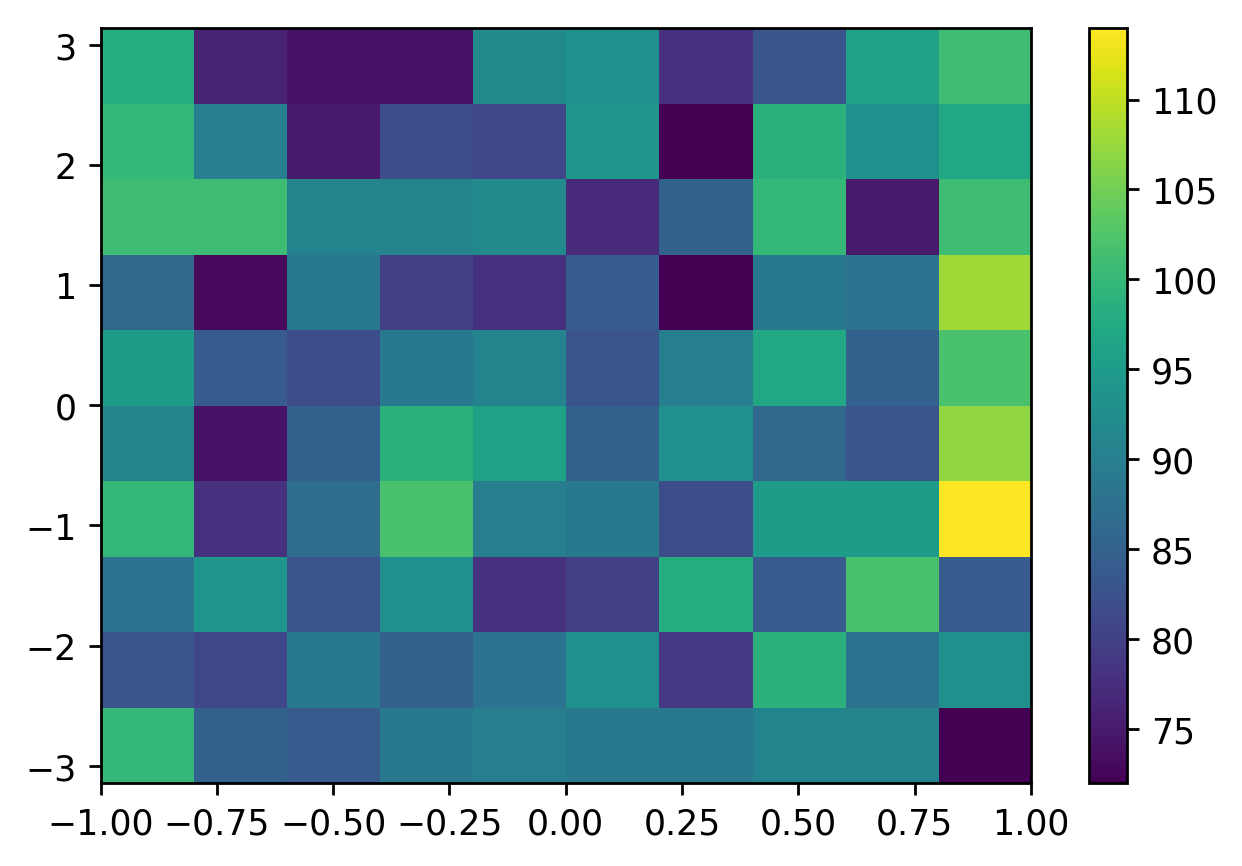

In [10]:

plt.figure()
r=plt.hist(exitPositions[0],range=(geo.radius-0.001,geo.radius+0.001))
plt.title('exit Position R')
plt.xlabel('exit Position, r [cm]')
plt.yscale('log')

plt.figure()
c=plt.hist(exitPositions[1],20)
plt.title(r'exitPositions: $\cos\theta$')
plt.figure()
p=plt.hist(exitPositions[2],20)
plt.title(r'exitPositions: $\phi$')
plt.figure()
cp=plt.hist2d(exitPositions[1],exitPositions[2])
plt.colorbar()

print('radius',r[0])
print('cos theta',c[0],np.mean(c[0]),np.std(c[0]),np.sqrt(np.mean(c[0])))
print ('phi',p[0],p[0],np.mean(p[0]),np.std(p[0]),np.sqrt(np.mean(p[0])))
print('cp',cp[0],cp[0],np.mean(cp[0]),np.std(cp[0]),np.sqrt(np.mean(cp[0])))

(array([  22.,   97.,  173.,  288.,  419.,  549.,  702.,  756.,  834.,  796.]), array([ 0.4827256 ,  1.43439765,  2.38606969,  3.33774173,  4.28941377,
        5.24108582,  6.19275786,  7.1444299 ,  8.09610194,  9.04777398,
        9.99944603]), <a list of 10 Patch objects>)
fission costheta (array([ 525.,  415.,  501.,  413.,  419.,  421.,  483.,  461.,  495.,  503.]), array([ -9.99863953e-01,  -7.99880123e-01,  -5.99896293e-01,
        -3.99912463e-01,  -1.99928633e-01,   5.51970845e-05,
         2.00039027e-01,   4.00022857e-01,   6.00006687e-01,
         7.99990517e-01,   9.99974347e-01]), <a list of 10 Patch objects>)
fission phi (array([ 428.,  491.,  473.,  512.,  452.,  505.,  431.,  466.,  454.,  424.]), array([ -3.13987983e+00,  -2.51179822e+00,  -1.88371662e+00,
        -1.25563502e+00,  -6.27553419e-01,   5.28182864e-04,
         6.28609785e-01,   1.25669139e+00,   1.88477299e+00,
         2.51285459e+00,   3.14093619e+00]), <a list of 10 Patch objects>)


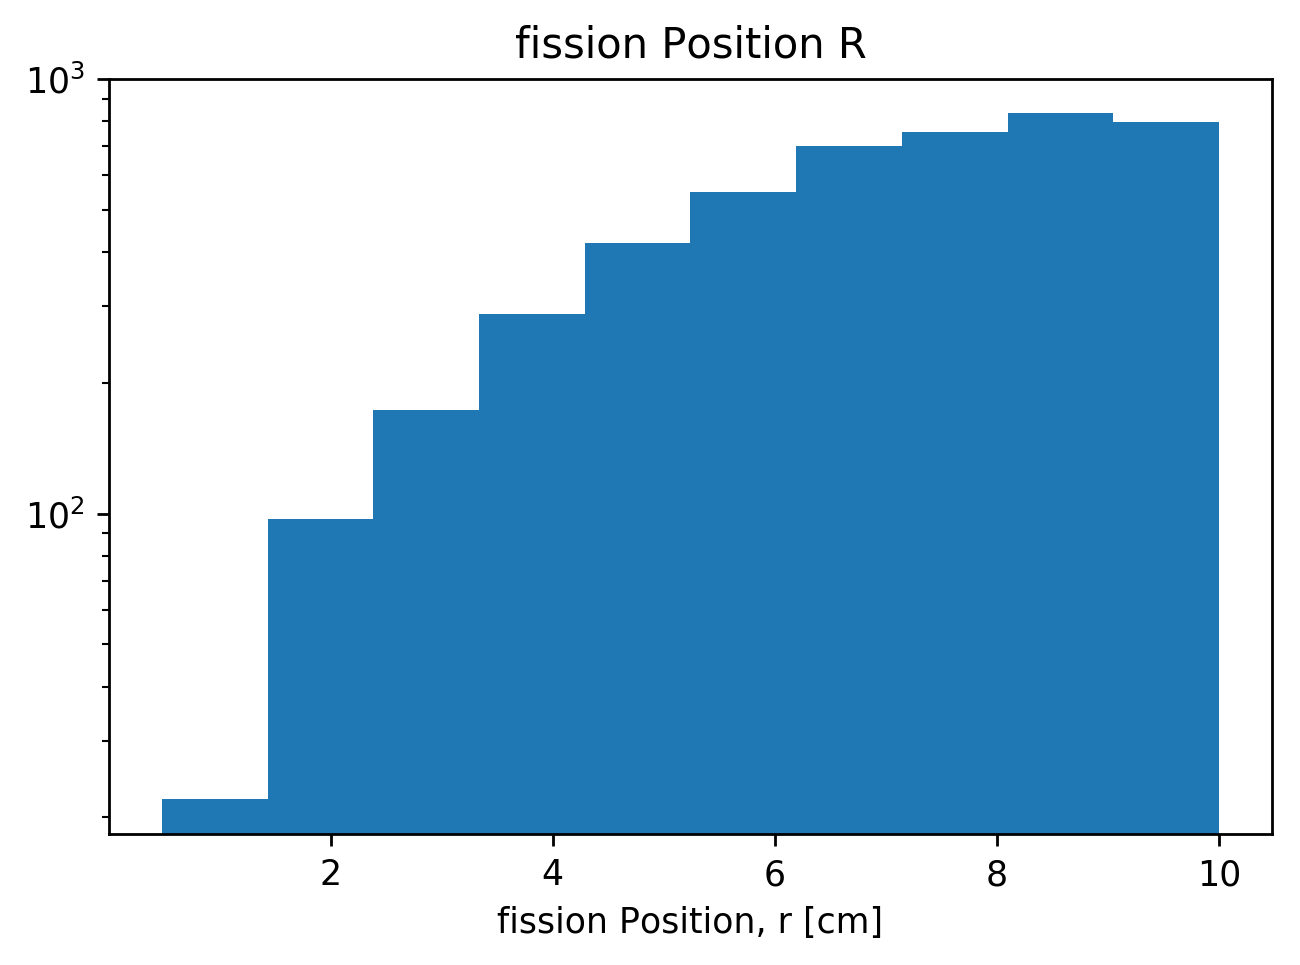

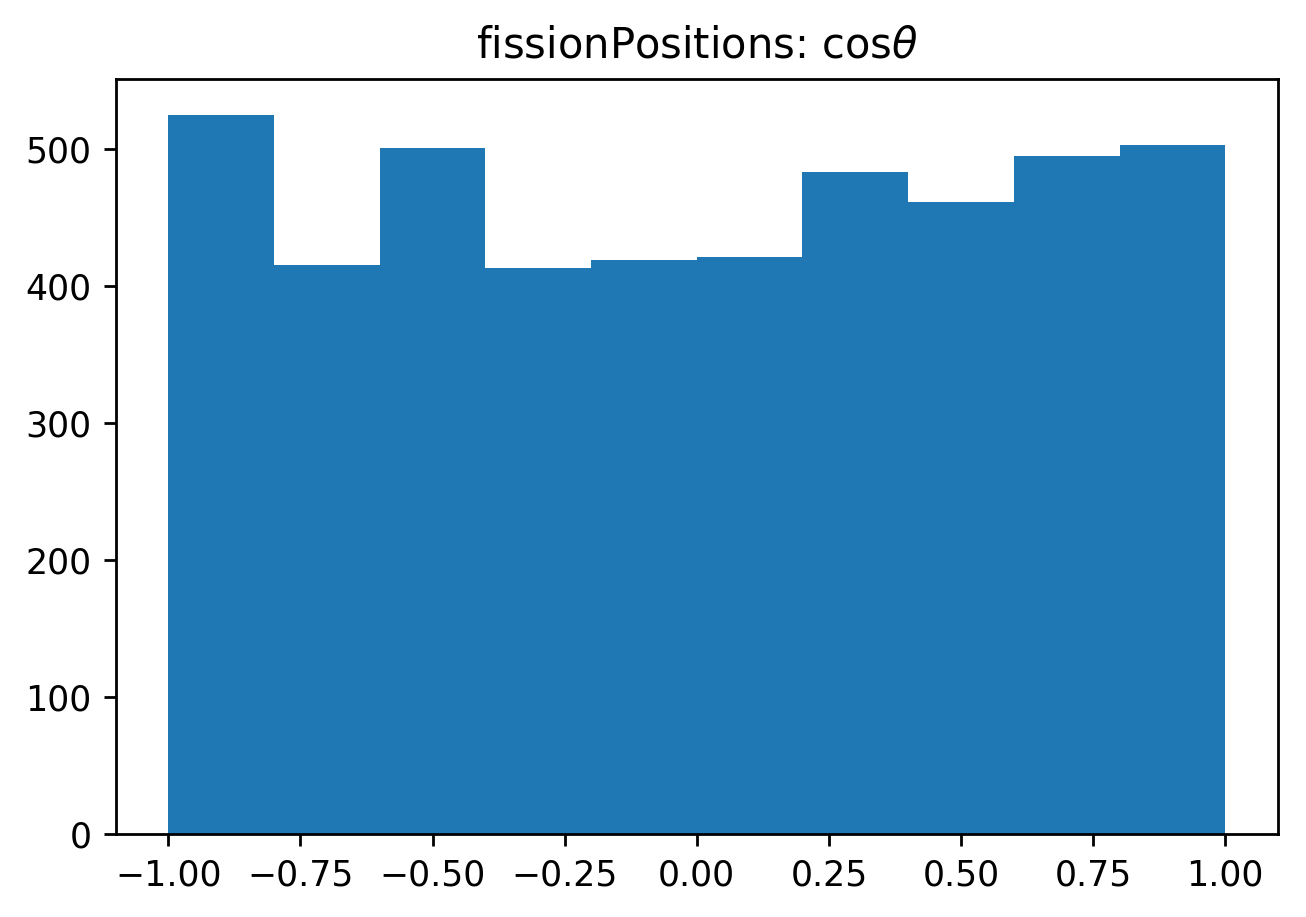

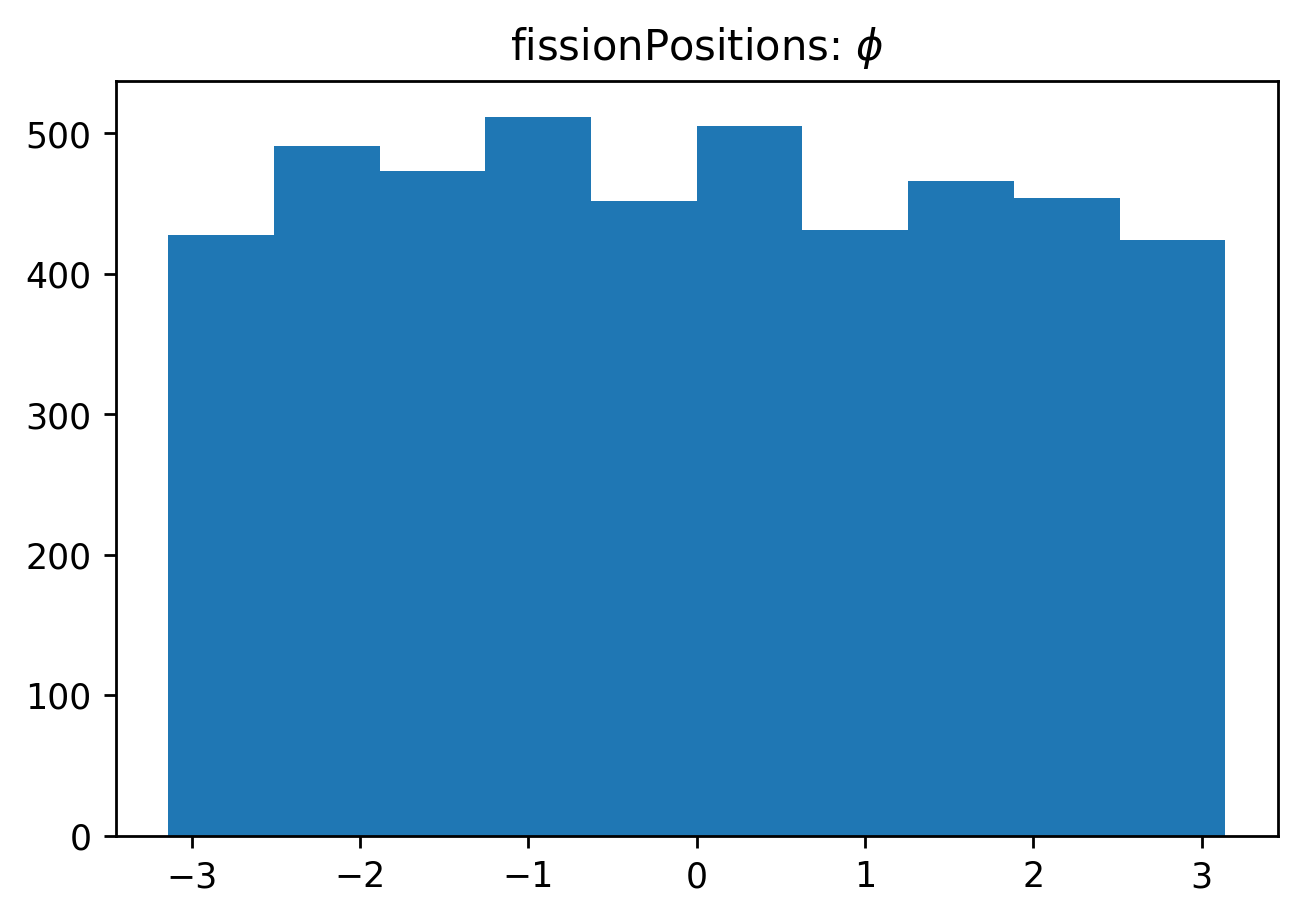

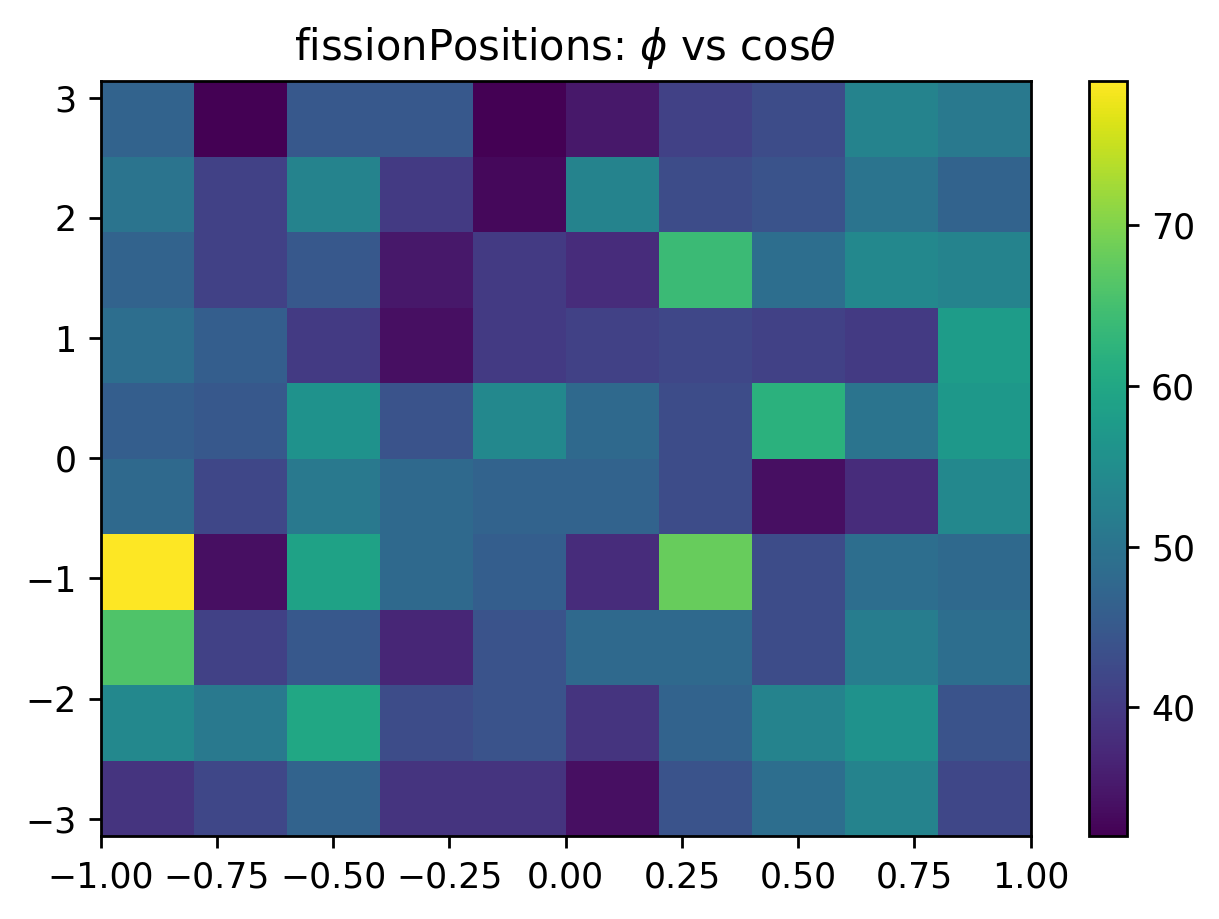

In [12]:

plt.figure()
retr=plt.hist(fissionPositions[0])
plt.title('fission Position R')
plt.xlabel('fission Position, r [cm]')
plt.yscale('log')
print(retr)

plt.figure()
print('fission costheta',plt.hist(fissionPositions[1]))
plt.title(r'fissionPositions: $\cos\theta$')
plt.figure()
print('fission phi',plt.hist(fissionPositions[2]))
plt.title(r'fissionPositions: $\phi$')
plt.figure()
plt.title(r'fissionPositions: $\phi$ vs $\cos\theta$')
plt.hist2d(fissionPositions[1],fissionPositions[2])
plt.colorbar()

In [13]:
geo.mat.nDaughtersHist


[[3565329.4645311409, 5],
 [2350370.6685914509, 5],
 [2345542.1557867383, 3],
 [1383105.3411684043, 2],
 [658801.8400584664, 3],
 [2135921.7315543615, 2],
 [1258963.2347895354, 5],
 [291667.73800162401, 3],
 [3780272.10609131, 6],
 [1906299.4855879107, 3],
 [2895523.4052748266, 3],
 [856202.8842427189, 4],
 [180628.33908257587, 1],
 [1621357.0801364337, 2],
 [2520338.7500326587, 1],
 [2289507.8591980874, 3],
 [1113002.0062648545, 1],
 [135996.41307478826, 4],
 [806775.82749023393, 3],
 [750891.40591618209, 5],
 [5223534.427056537, 4],
 [3590291.7720735115, 4],
 [6030590.6201626658, 6],
 [1011052.0749912267, 3],
 [5971420.0272066938, 1],
 [216935.6378296343, 3],
 [2680090.3529483369, 5],
 [1072096.3962808133, 3],
 [1848547.4864697084, 0],
 [1921206.5822846587, 5],
 [1494764.8916344452, 1],
 [7801168.8783710767, 6],
 [1136986.6018515171, 4],
 [3135150.7332929228, 1],
 [1259999.6323492508, 2],
 [300564.22124511667, 6],
 [2762588.6861378662, 1],
 [1096312.8609886828, 4],
 [2877874.09428447

## Now check the material validity

We have 3 arrays that are filled in materials as we generate neutrons:
cthetaHist:  energy and cos scattering angle for the elasic scatters
daughterHist:  energy of the generated neutrons
nDaughtersHist:  energy and number of daughters


In [14]:
import numpy as np
import pdb 

def spherical(x):
    '''conversion from Cartesian to Spherical coordinates.  Why is it not already in numpy?''' 
    r=np.linalg.norm(x)
    ct=x[2]/r
    phi=np.arctan2(x[1],x[0])
    return (r,ct,phi)

exitPositions=[] # where neutrons leave the sphere
startPositions=[] #where mothers are generated
fissionPositions=[] #where fissions occur

Neutron.output=False #turn off print statements
for run in range(1,1000):
#    pdb.set_trace()
    n.TrackNeutrons(10000)
    startPositions.append(spherical(Neutron.firstNeutronStartPosition))
    for i in range (0,Neutron.numberOfBins):
        for j in range(0,len(Neutron.list[i])):
            d=Neutron.list[i][j].nDaughters
            if 'escape' in d:
                exitPositions.append(spherical(Neutron.list[i][j].position))
            else:
                fissionPositions.append(spherical(Neutron.list[i][j].position))
    if run%100==0:
        print('Run #%d, length of cthetaHist %d'%(run,len(geo.mat.cthetaHist)))

#now we convert the lists into np arrays with rows corresponding to r, ctheta,phi
startPositions=np.array(startPositions).transpose()
exitPositions=np.array(exitPositions).transpose()
fissionPositions=np.array(fissionPositions).transpose()


Run #100, length of cthetaHist 30074
Run #200, length of cthetaHist 31078
Run #300, length of cthetaHist 34655
Run #400, length of cthetaHist 35823
Run #500, length of cthetaHist 36883
Run #600, length of cthetaHist 38416
Run #700, length of cthetaHist 39346
Run #800, length of cthetaHist 42803
Run #900, length of cthetaHist 43221


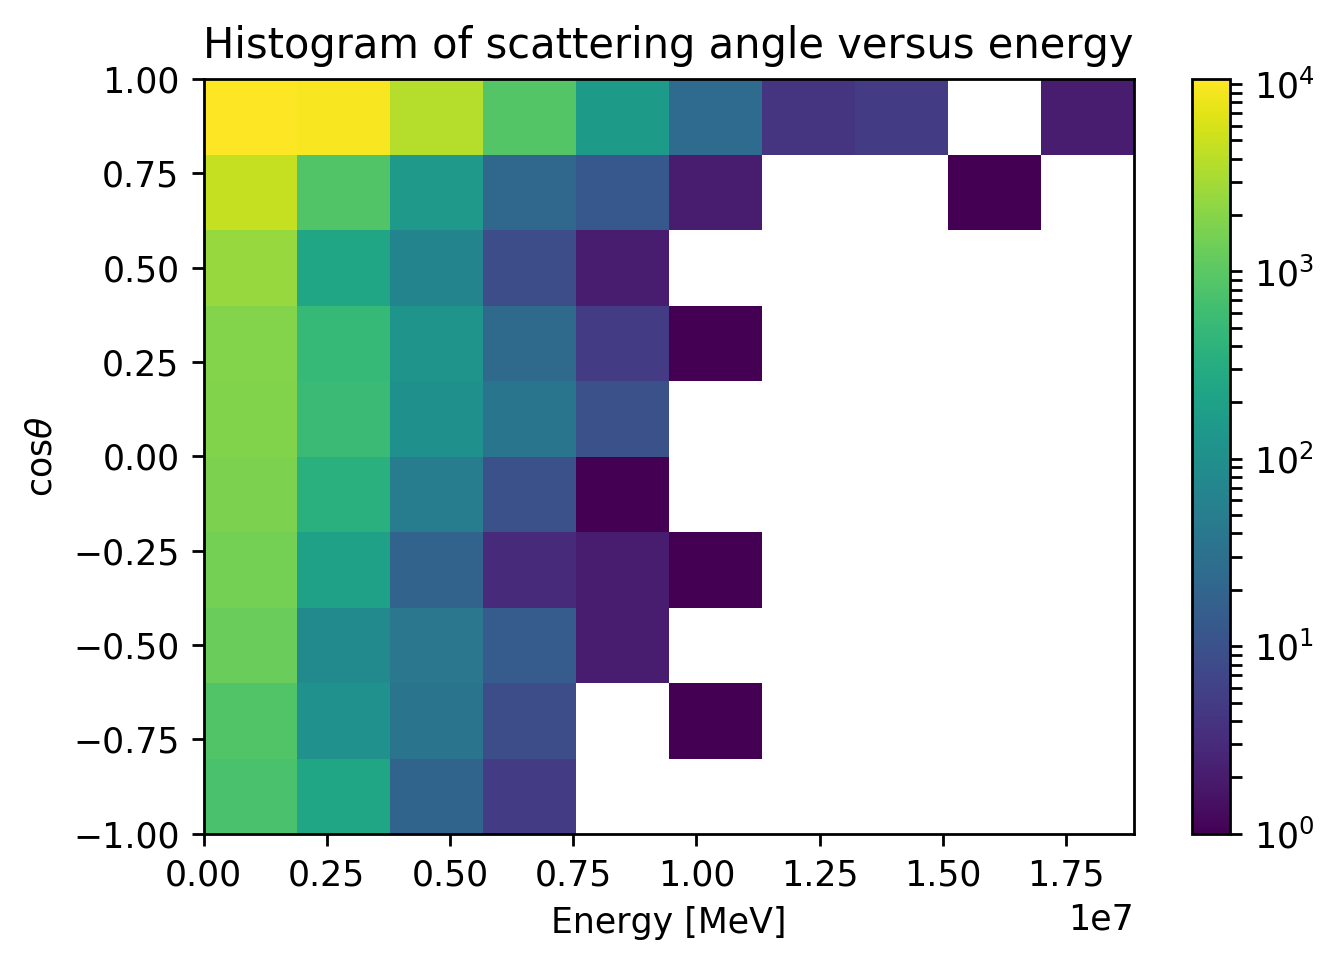

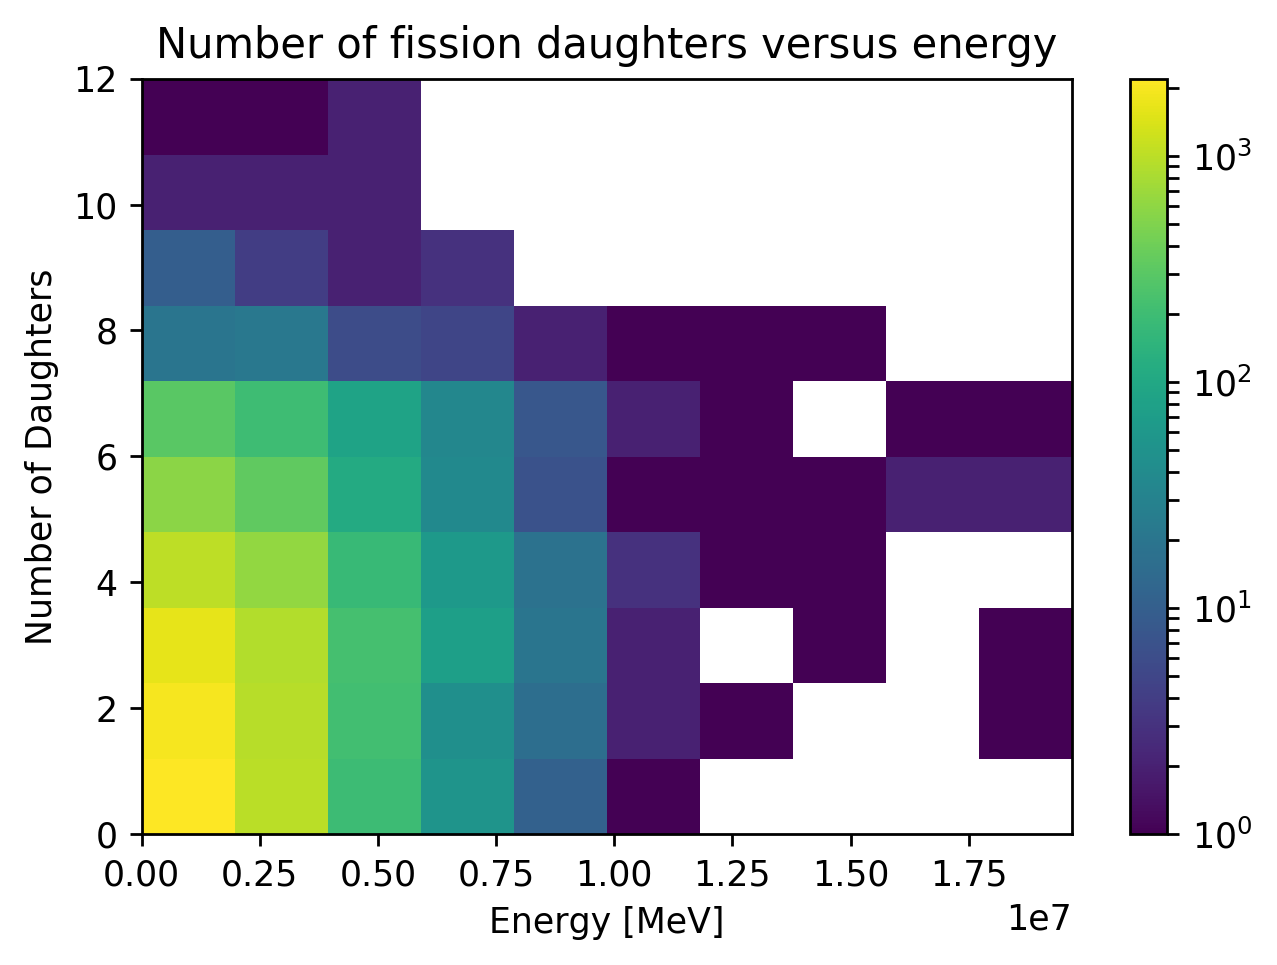

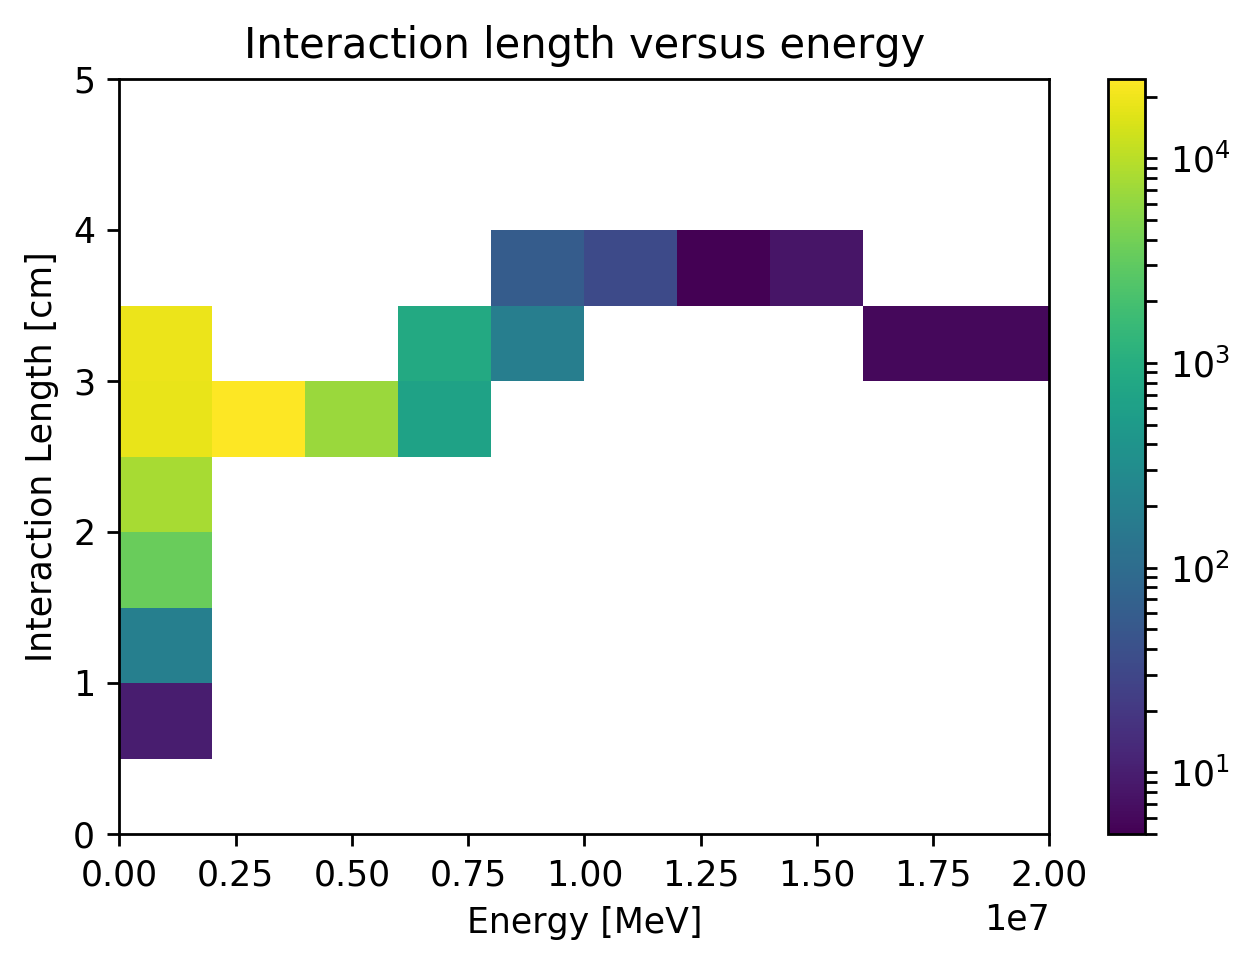

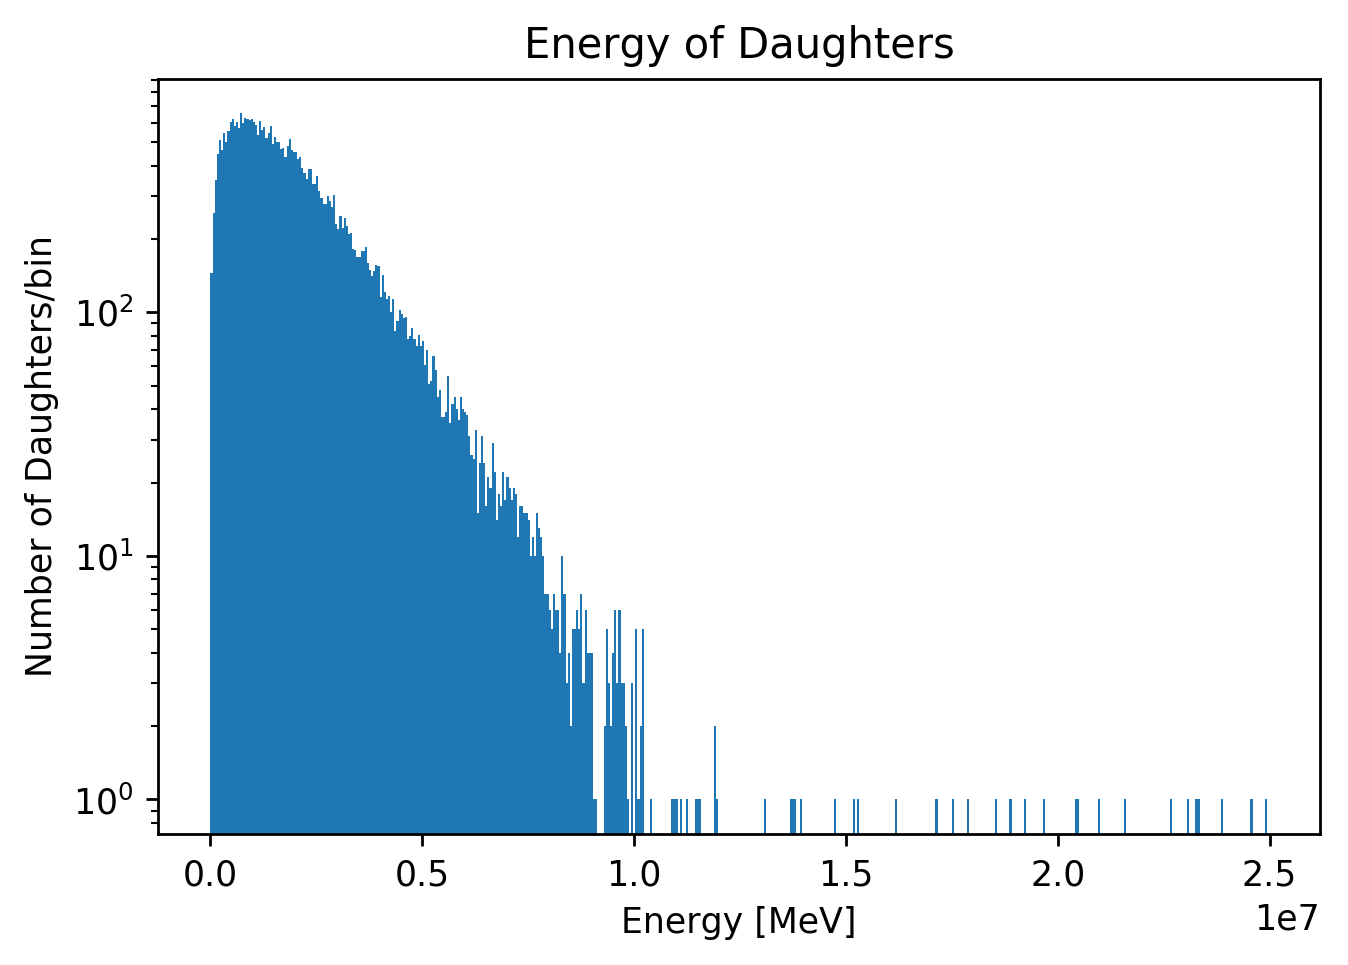

In [15]:
import matplotlib.colors as colors

ct=np.array(geo.mat.cthetaHist).transpose()
plt.figure()
plt.hist2d(ct[0],ct[1],norm=colors.LogNorm())
plt.colorbar()
plt.title('Histogram of scattering angle versus energy')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'$\cos\theta$')

nd=np.array(geo.mat.nDaughtersHist).transpose()
plt.figure()
plt.hist2d(nd[0],nd[1],norm=colors.LogNorm())
plt.colorbar()
plt.title('Number of fission daughters versus energy')
plt.xlabel('Energy [MeV]')
plt.ylabel('Number of Daughters')

l=np.array(geo.mat.distanceHist).transpose()
plt.figure()
plt.hist2d(l[0],l[1],range=([0,2e7],[0,5]),norm=colors.LogNorm())
plt.colorbar()
plt.title('Interaction length versus energy')
plt.xlabel('Energy [MeV]')
plt.ylabel('Interaction Length [cm]')

d=np.array(geo.mat.daughterHist)
plt.figure()
plt.hist(d,500)
plt.yscale('log')
plt.title('Energy of Daughters')
plt.xlabel('Energy [MeV]')
plt.ylabel('Number of Daughters/bin')

We double check the interaction length- we see by hand that we expect something like 5.7 barns at 1 e7 eV- which works out to 3.6 cm.  So that is close.  The other interactions seems reasonable.  

## Plotting physics output

Our next step is to generate a plot of the number of neutrons as a function of time, and the distribution of number of neutrons per mother neutron.

In [16]:
n=Neutron()
geo.radius=10.0  

exitPositions=[] # where neutrons leave the sphere
startPositions=[] #where mothers are generated
fissionPositions=[] #where fissions occur
number=[]  #number of neutrons


Neutron.output=False #turn off print statements

trange=np.arange(0,Neutron.maxTime, Neutron.timeBin)
neutrons=np.zeros(Neutron.numberOfBins)

for run in range(1,1000):
#    pdb.set_trace()
    n.TrackNeutrons(10000)
    startPositions.append(spherical(Neutron.firstNeutronStartPosition))
    count=0
    for i in range (0,Neutron.numberOfBins):
        for j in range(0,len(Neutron.list[i])):
            count+=1
            nn=Neutron.list[i][j]
            d=nn.nDaughters
            if 'escape' in d:
                exitPositions.append(spherical(Neutron.list[i][j].position))
            else:
                fissionPositions.append(spherical(Neutron.list[i][j].position))
            #now increment the neutrons versus time
            t1=int(nn.time0/Neutron.timeBin)
            t2=int(nn.time/Neutron.timeBin)+1
            if t1>=Neutron.numberOfBins:
                t1=Neutron.numberOfBins-1
            if t2>Neutron.numberOfBins:
                t2=Neutron.numberOfBins
            for t in range(t1,t2):
                neutrons[t]+=1
    
    number.append(count)
    if run%100==0:
        print('Run #',run)

#now we convert the lists into np arrays with rows corresponding to r, ctheta,phi
startPositions=np.array(startPositions).transpose()
exitPositions=np.array(exitPositions).transpose()
fissionPositions=np.array(fissionPositions).transpose()
number=np.array(number)

Run # 100
Run # 200
Run # 300
Run # 400
Run # 500
Run # 600
Run # 700
Run # 800
Run # 900


Number ofneutrons 10237


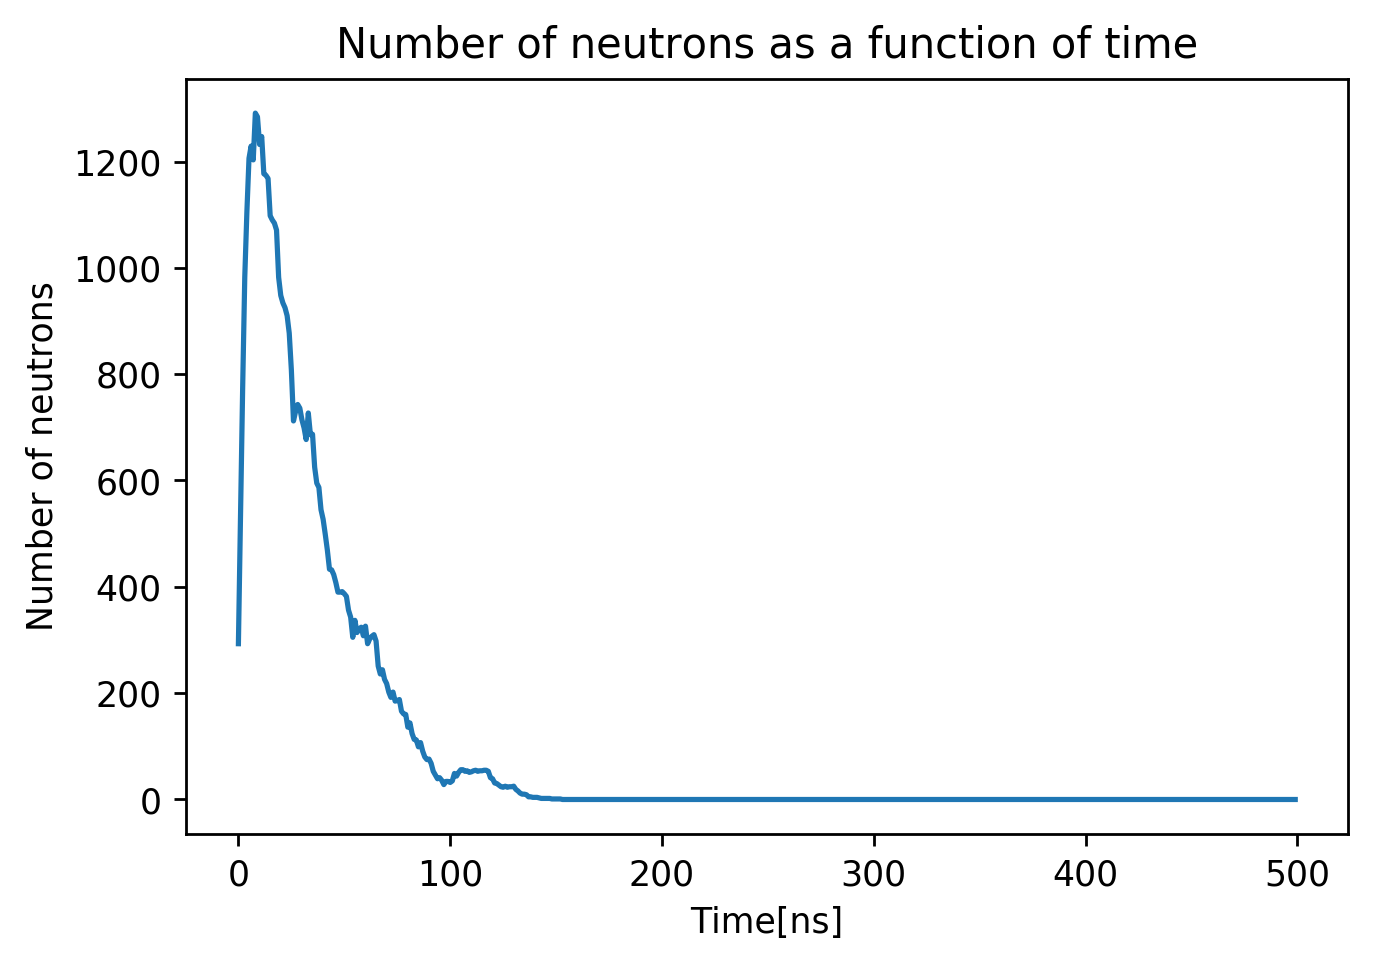

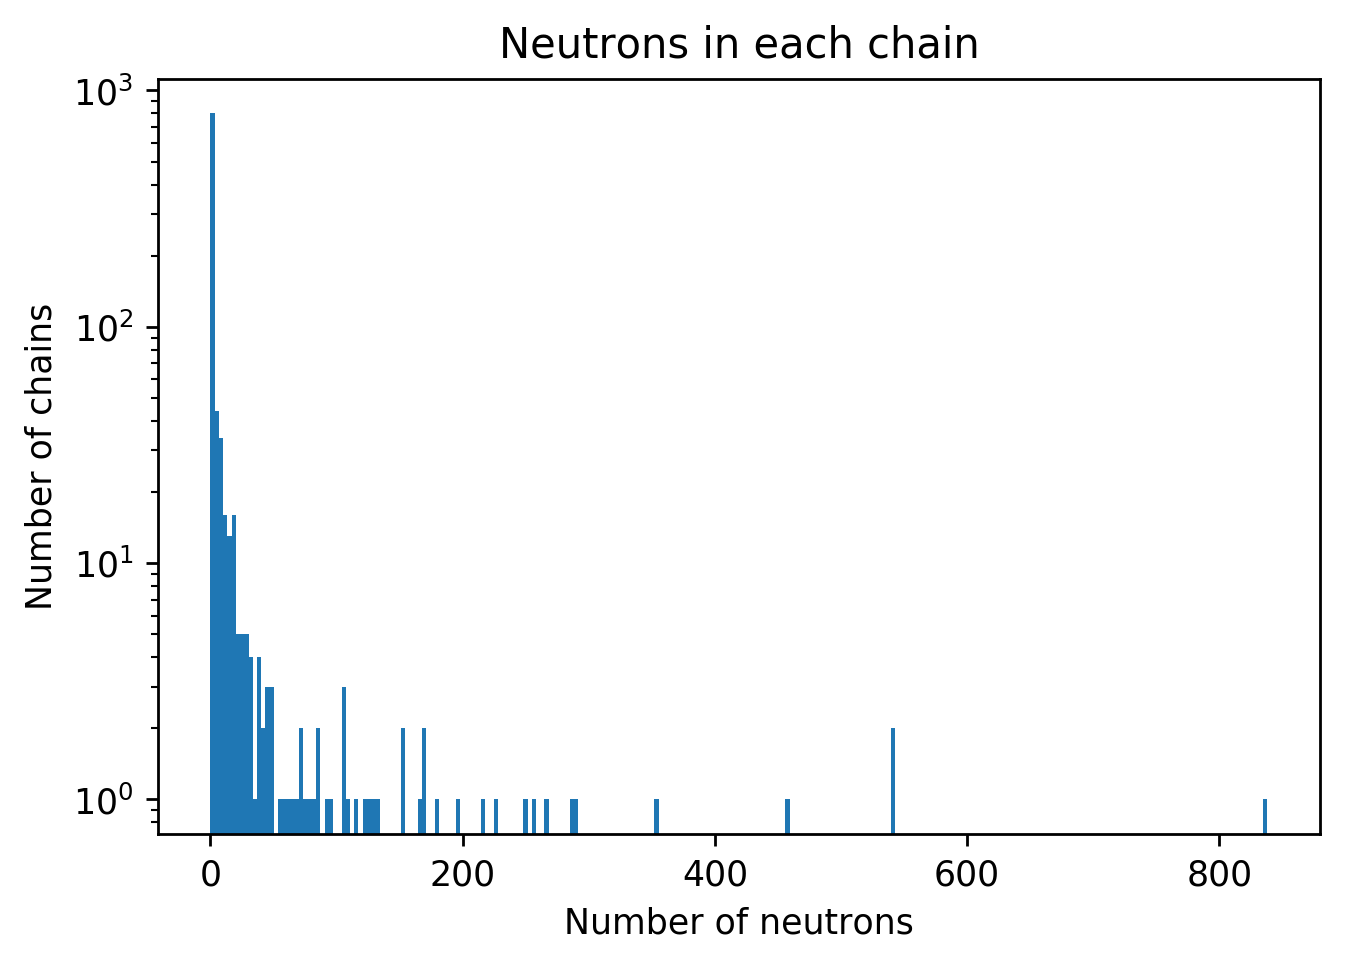

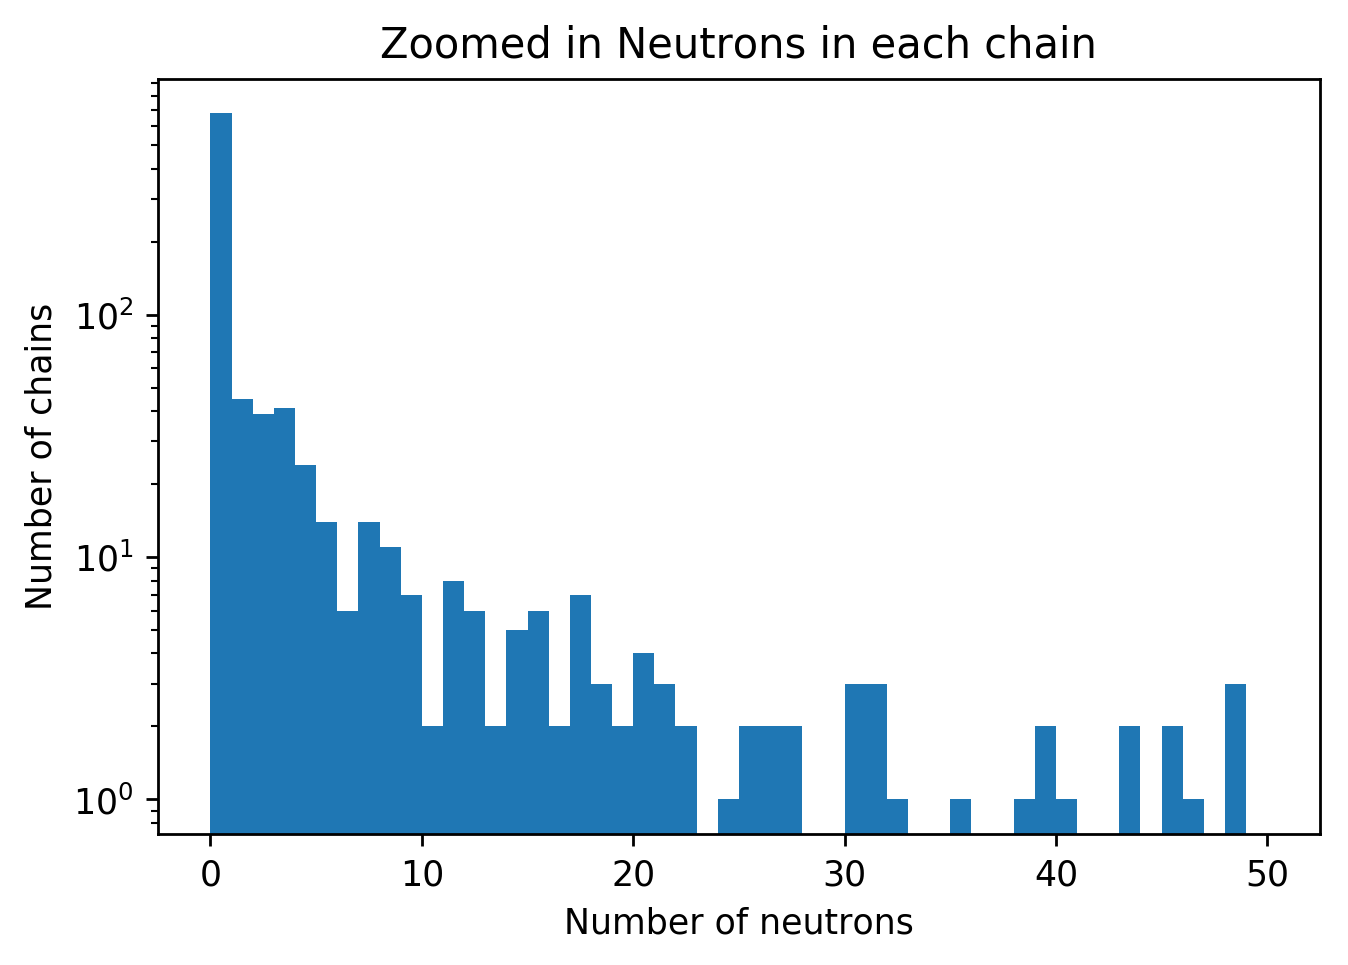

In [17]:
plt.figure()
plt.plot(trange,neutrons)
plt.title ('Number of neutrons as a function of time')
plt.xlabel('Time[ns]')
plt.ylabel('Number of neutrons')
plt.figure()
plt.hist(number,250)
plt.title("Neutrons in each chain")
plt.xlabel("Number of neutrons")
plt.ylabel("Number of chains")
plt.yscale('log')
plt.figure()
plt.hist(number,50,range=(0,50))
plt.title("Zoomed in Neutrons in each chain")
plt.xlabel("Number of neutrons")
plt.ylabel("Number of chains")
plt.yscale('log')
print('Number ofneutrons', np.sum(number))

Rerun, changing the radius to 10.4 cm

In [18]:
geo.radius=10.4

exitPositions=[] # where neutrons leave the sphere
startPositions=[] #where mothers are generated
fissionPositions=[] #where fissions occur
number=[]  #number of neutrons


Neutron.output=False #turn off print statements

trange=np.arange(0,Neutron.maxTime, Neutron.timeBin)
neutrons=np.zeros(Neutron.numberOfBins)

for run in range(1,1000):
#    pdb.set_trace()
    n.TrackNeutrons(1000000)
    startPositions.append(spherical(Neutron.firstNeutronStartPosition))
    count=0
    for i in range (0,Neutron.numberOfBins):
        for j in range(0,len(Neutron.list[i])):
            count+=1
            nn=Neutron.list[i][j]
            d=nn.nDaughters
            if 'escape' in d:
                exitPositions.append(spherical(Neutron.list[i][j].position))
            else:
                fissionPositions.append(spherical(Neutron.list[i][j].position))
            #now increment the neutrons versus time
            t1=int(nn.time0/Neutron.timeBin)
            t2=int(nn.time/Neutron.timeBin)+1
            if t1>=Neutron.numberOfBins:
                t1=Neutron.numberOfBins-1
            if t2>Neutron.numberOfBins:
                t2=Neutron.numberOfBins
            for t in range(t1,t2):
                neutrons[t]+=1
    
    number.append(count)
    if run%100==0:
        print('Run #',run)

#now we convert the lists into np arrays with rows corresponding to r, ctheta,phi
startPositions=np.array(startPositions).transpose()
exitPositions=np.array(exitPositions).transpose()
fissionPositions=np.array(fissionPositions).transpose()
number=np.array(number)


Run # 100
Run # 200
Run # 300
Run # 400
Run # 500
Run # 600
Run # 700
Run # 800
Run # 900


Number ofneutrons 31620


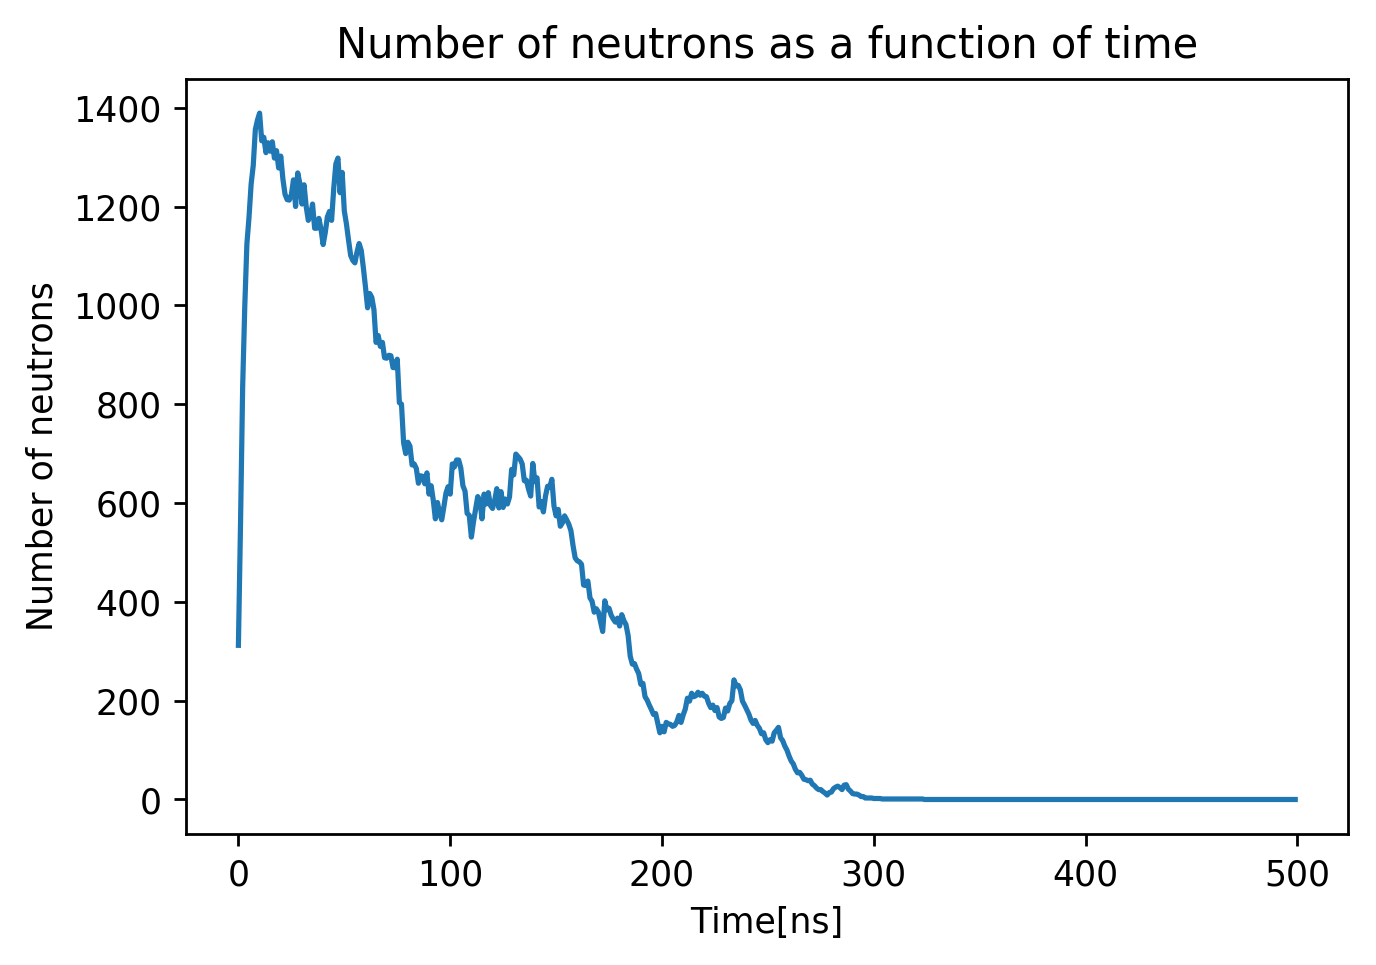

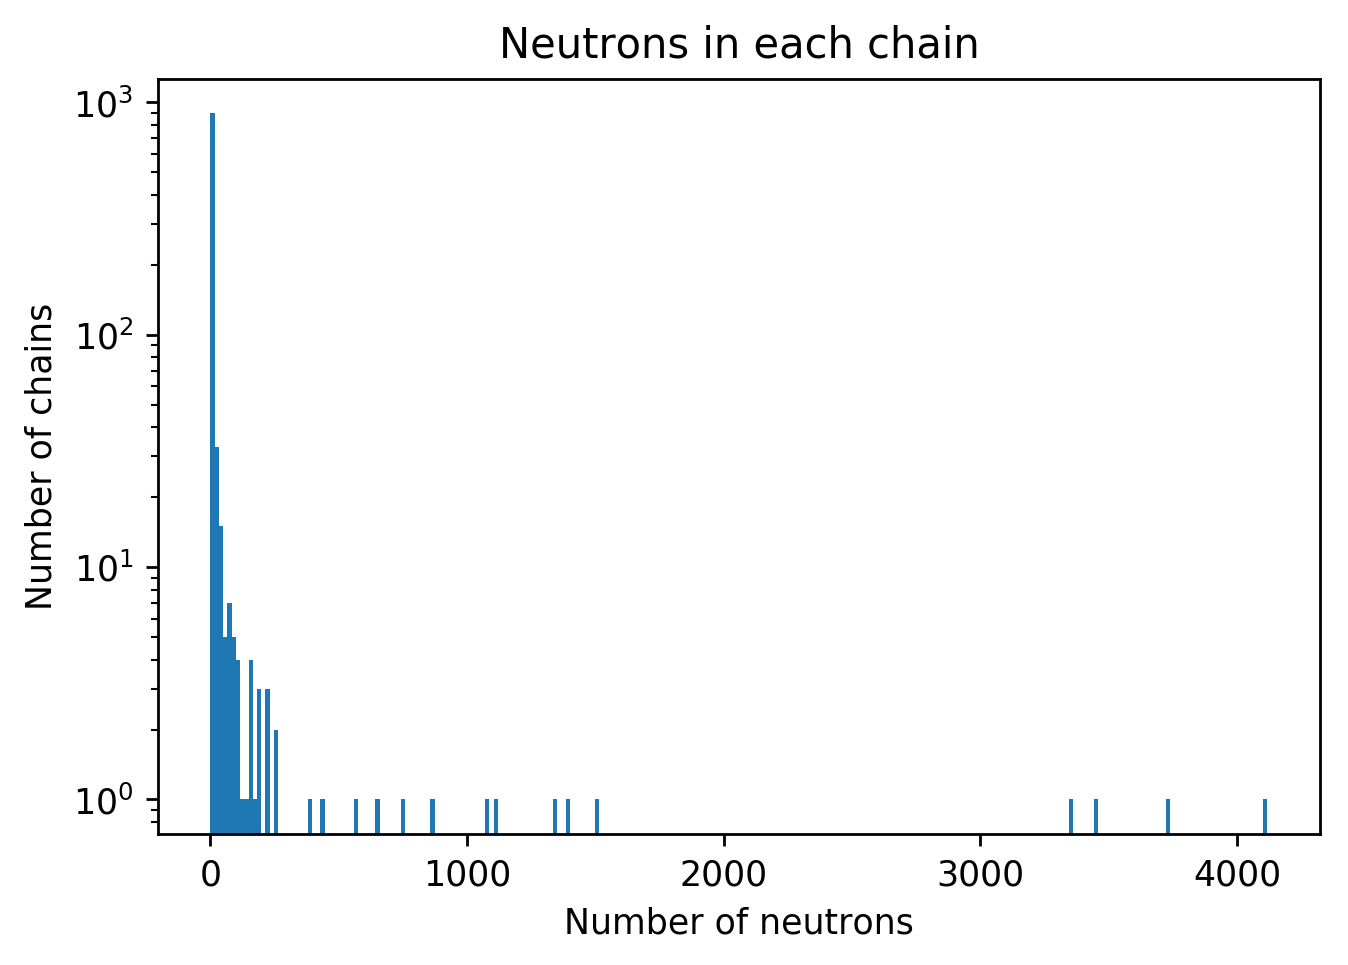

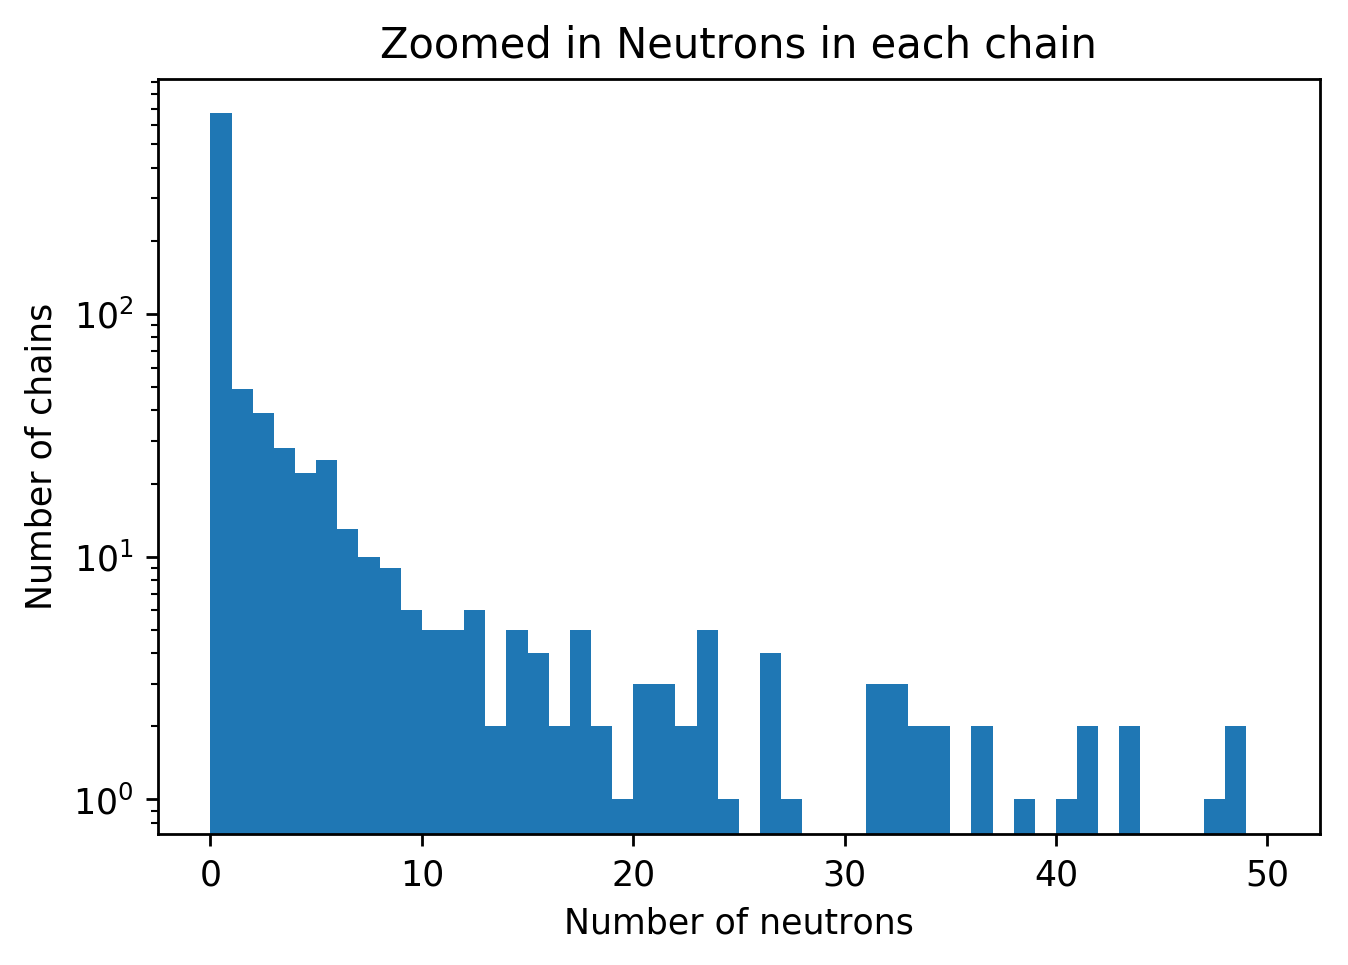

In [19]:
plt.figure()
plt.plot(trange,neutrons)
plt.title ('Number of neutrons as a function of time')
plt.xlabel('Time[ns]')
plt.ylabel('Number of neutrons')
plt.figure()
plt.hist(number,250)
plt.title("Neutrons in each chain")
plt.xlabel("Number of neutrons")
plt.ylabel("Number of chains")
plt.yscale('log')
plt.figure()
plt.hist(number,50,range=(0,50))
plt.title("Zoomed in Neutrons in each chain")
plt.xlabel("Number of neutrons")
plt.ylabel("Number of chains")
plt.yscale('log')
print('Number ofneutrons', np.sum(number))


In [20]:
geo.radius=10.6

exitPositions=[] # where neutrons leave the sphere
startPositions=[] #where mothers are generated
fissionPositions=[] #where fissions occur
number=[]  #number of neutrons


Neutron.output=False #turn off print statements

trange=np.arange(0,Neutron.maxTime, Neutron.timeBin)
neutrons=np.zeros(Neutron.numberOfBins)

for run in range(1,1000):
#    pdb.set_trace()
    n.TrackNeutrons(10000000)
    startPositions.append(spherical(Neutron.firstNeutronStartPosition))
    count=0
    for i in range (0,Neutron.numberOfBins):
        for j in range(0,len(Neutron.list[i])):
            count+=1
            nn=Neutron.list[i][j]
            d=nn.nDaughters
            if 'escape' in d:
                exitPositions.append(spherical(Neutron.list[i][j].position))
            else:
                fissionPositions.append(spherical(Neutron.list[i][j].position))
            #now increment the neutrons versus time
            t1=int(nn.time0/Neutron.timeBin)
            t2=int(nn.time/Neutron.timeBin)+1
            if t1>=Neutron.numberOfBins:
                t1=Neutron.numberOfBins-1
            if t2>Neutron.numberOfBins:
                t2=Neutron.numberOfBins
            for t in range(t1,t2):
                neutrons[t]+=1
    
    number.append(count)
    if run%100==0:
        print('Run #',run)

#now we convert the lists into np arrays with rows corresponding to r, ctheta,phi
startPositions=np.array(startPositions).transpose()
exitPositions=np.array(exitPositions).transpose()
fissionPositions=np.array(fissionPositions).transpose()
number=np.array(number)


Run # 100
Run # 200
Run # 300
Run # 400
Run # 500
Run # 600
Run # 700
Run # 800
Run # 900


Number ofneutrons 49152


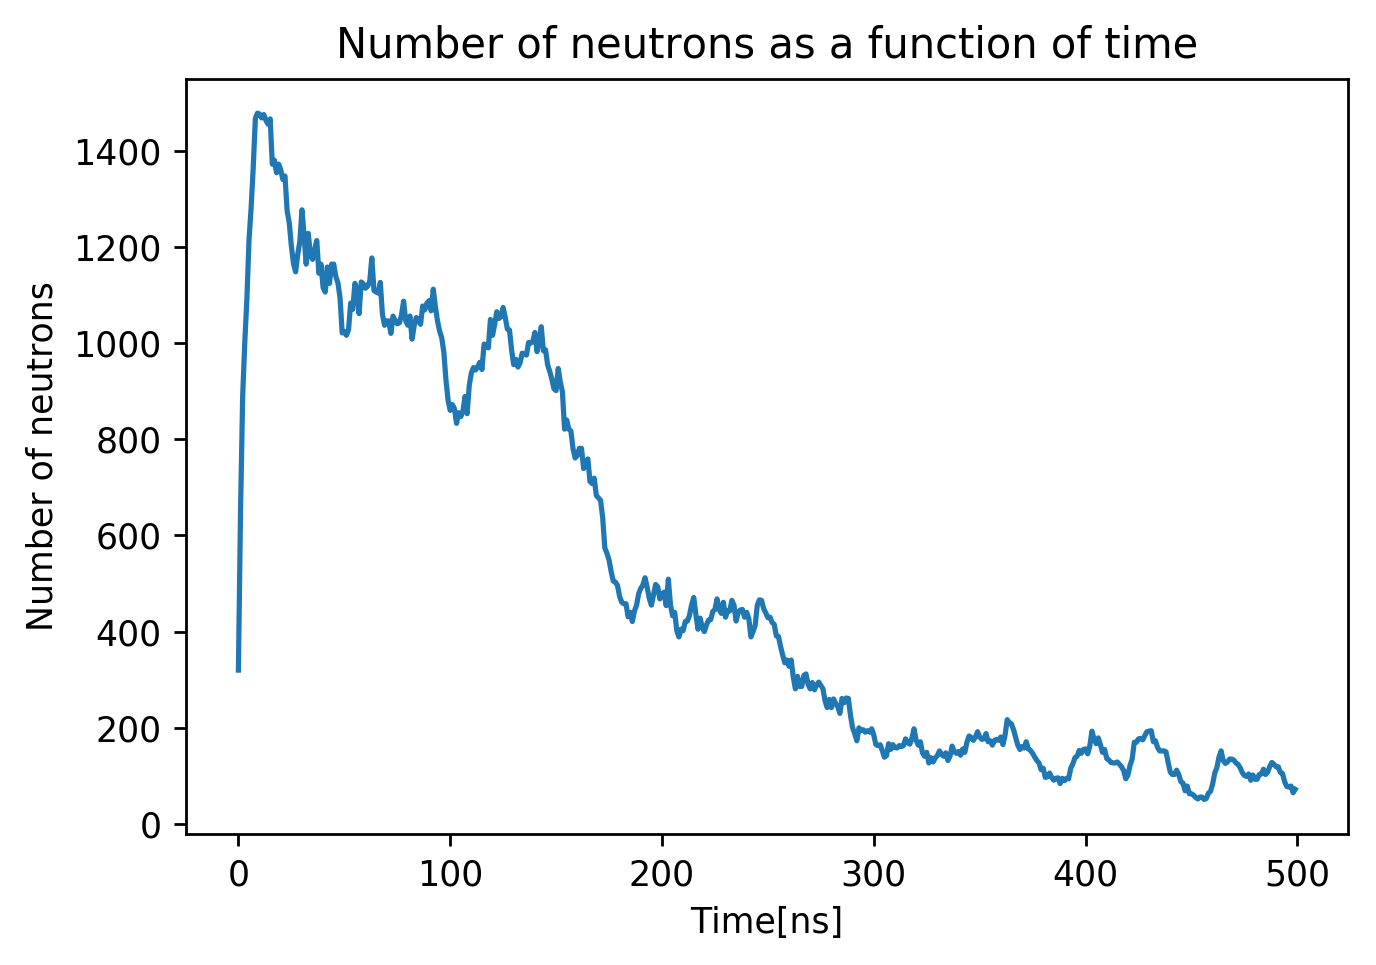

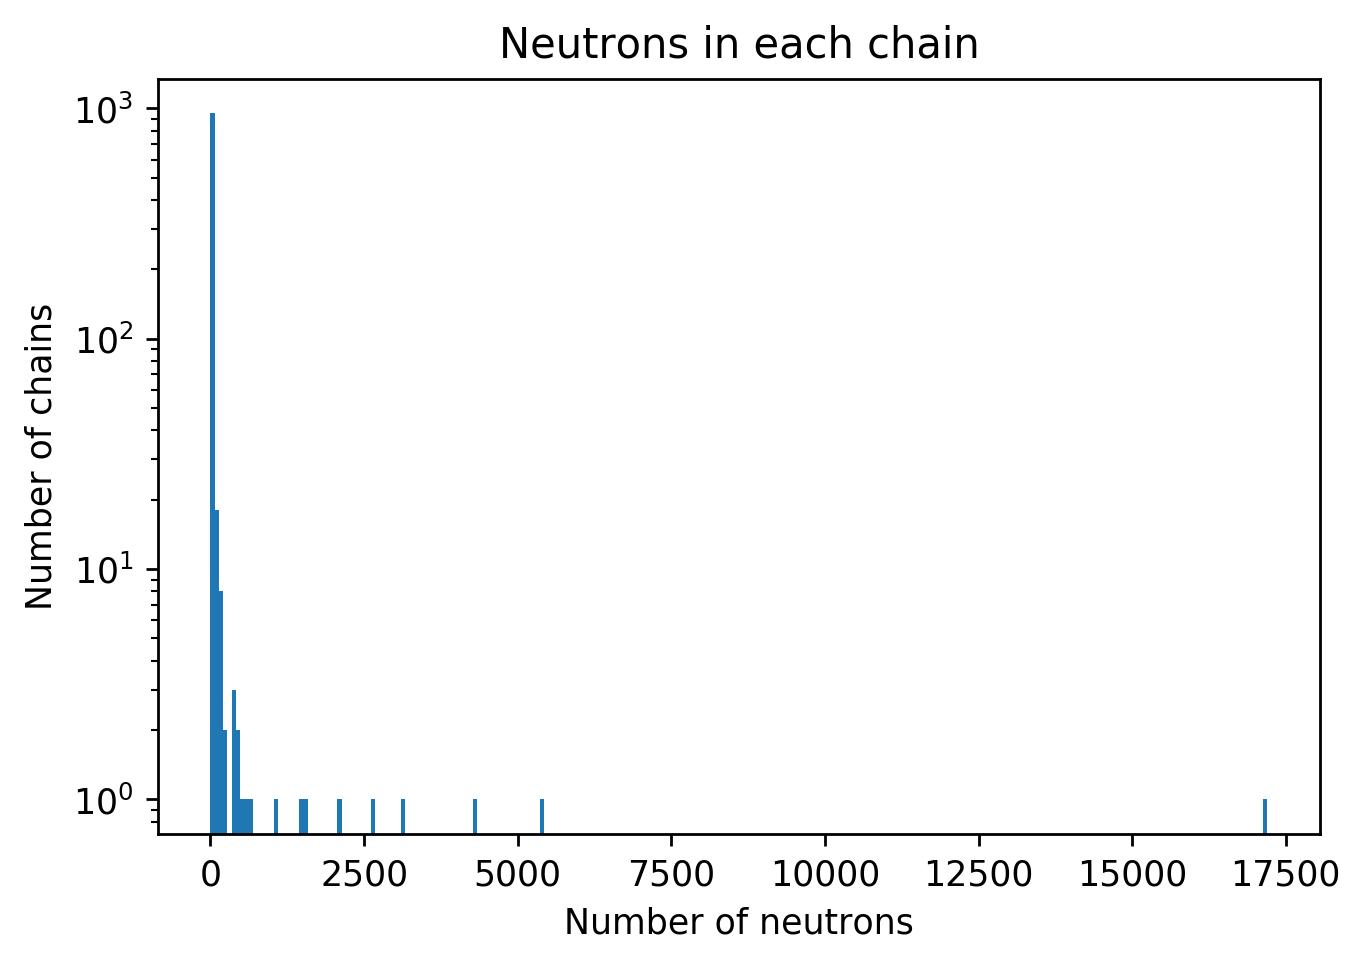

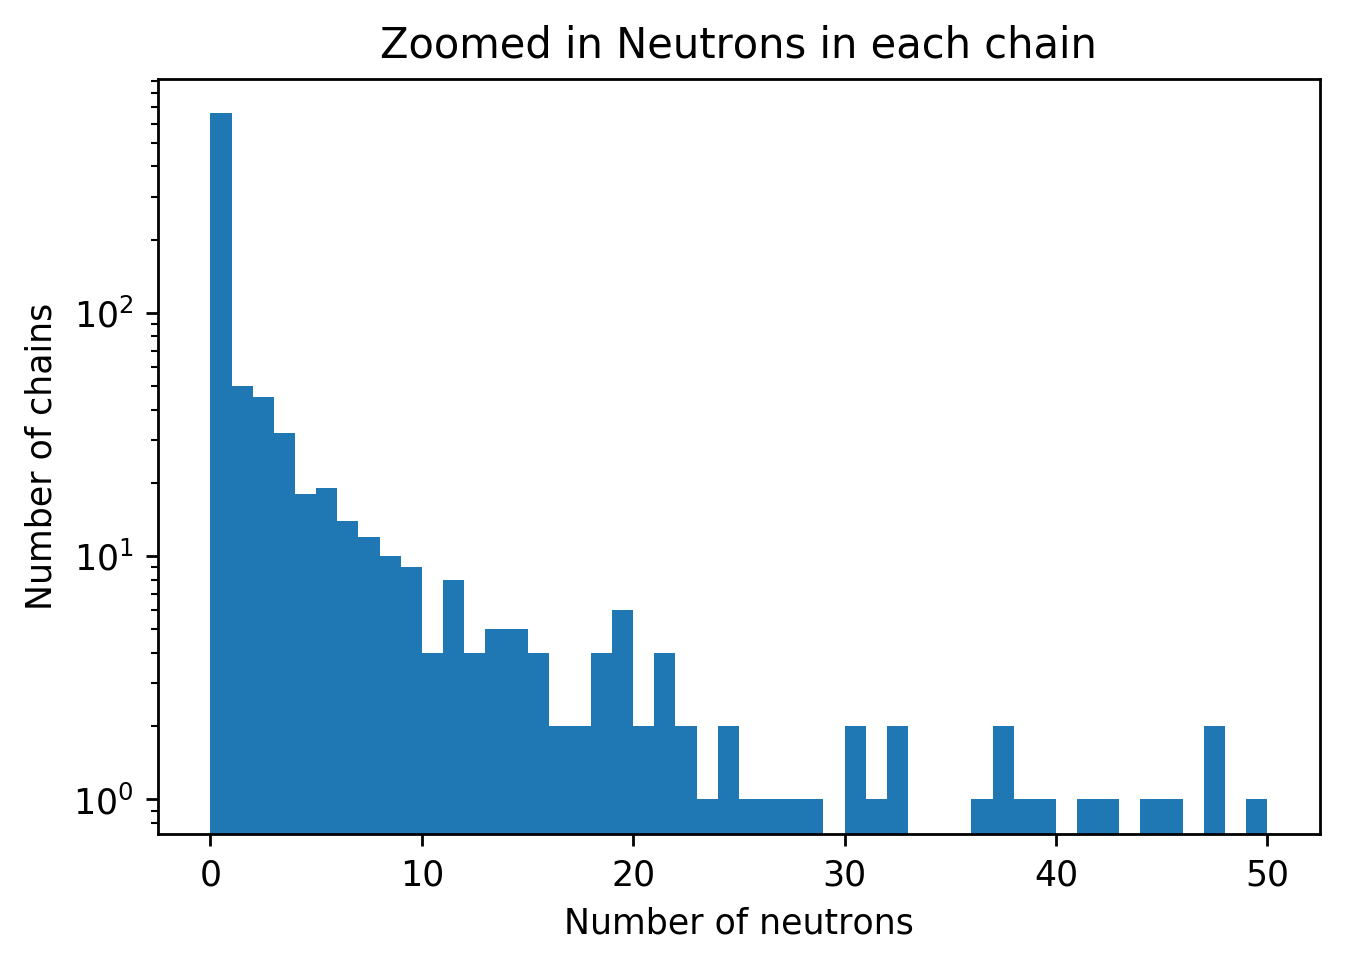

In [21]:
plt.figure()
plt.plot(trange,neutrons)
plt.title ('Number of neutrons as a function of time')
plt.xlabel('Time[ns]')
plt.ylabel('Number of neutrons')
plt.figure()
plt.hist(number,250)
plt.title("Neutrons in each chain")
plt.xlabel("Number of neutrons")
plt.ylabel("Number of chains")
plt.yscale('log')
plt.figure()
plt.hist(number,50,range=(0,50))
plt.title("Zoomed in Neutrons in each chain")
plt.xlabel("Number of neutrons")
plt.ylabel("Number of chains")
plt.yscale('log')
print('Number ofneutrons', np.sum(number))

Notice that the neutron yeild is quite stochastic.  There are only 5 runs with more than 2000 neutrons- but they produce more than half the total number of neutrons.  In looking at these chain reactions, we also need to remember that we are truncating at 500 ns (because otherwise the simulations would have no way to stop).

Now increase the radius to 10.7 cm, and decrease the number of runs to 200

In [22]:
geo.radius=10.7

exitPositions=[] # where neutrons leave the sphere
startPositions=[] #where mothers are generated
fissionPositions=[] #where fissions occur
number=[]  #number of neutrons


Neutron.output=False #turn off print statements

trange=np.arange(0,Neutron.maxTime, Neutron.timeBin)
neutrons=np.zeros(Neutron.numberOfBins)

for run in range(1,200):
#    pdb.set_trace()
    n.TrackNeutrons(10000000)
    startPositions.append(spherical(Neutron.firstNeutronStartPosition))
    count=0
    for i in range (0,Neutron.numberOfBins):
        for j in range(0,len(Neutron.list[i])):
            count+=1
            nn=Neutron.list[i][j]
            d=nn.nDaughters
            if 'escape' in d:
                exitPositions.append(spherical(Neutron.list[i][j].position))
            else:
                fissionPositions.append(spherical(Neutron.list[i][j].position))
            #now increment the neutrons versus time
            t1=int(nn.time0/Neutron.timeBin)
            t2=int(nn.time/Neutron.timeBin)+1
            if t1>=Neutron.numberOfBins:
                t1=Neutron.numberOfBins-1
            if t2>Neutron.numberOfBins:
                t2=Neutron.numberOfBins
            for t in range(t1,t2):
                neutrons[t]+=1
    
    number.append(count)
    if run%5 ==0:
        print('Run #',run)

#now we convert the lists into np arrays with rows corresponding to r, ctheta,phi
startPositions=np.array(startPositions).transpose()
exitPositions=np.array(exitPositions).transpose()
fissionPositions=np.array(fissionPositions).transpose()
number=np.array(number)


Run # 5
Run # 10
Run # 15
Run # 20
Run # 25
Run # 30
Run # 35
Run # 40
Run # 45
Run # 50
Run # 55
Run # 60
Run # 65
Run # 70
Run # 75
Run # 80
Run # 85
Run # 90
Run # 95
Run # 100
Run # 105
Run # 110
Run # 115
Run # 120
Run # 125
Run # 130
Run # 135
Run # 140
Run # 145
Run # 150
Run # 155
Run # 160
Run # 165
Run # 170
Run # 175
Run # 180
Run # 185
Run # 190
Run # 195


Number ofneutrons 4596


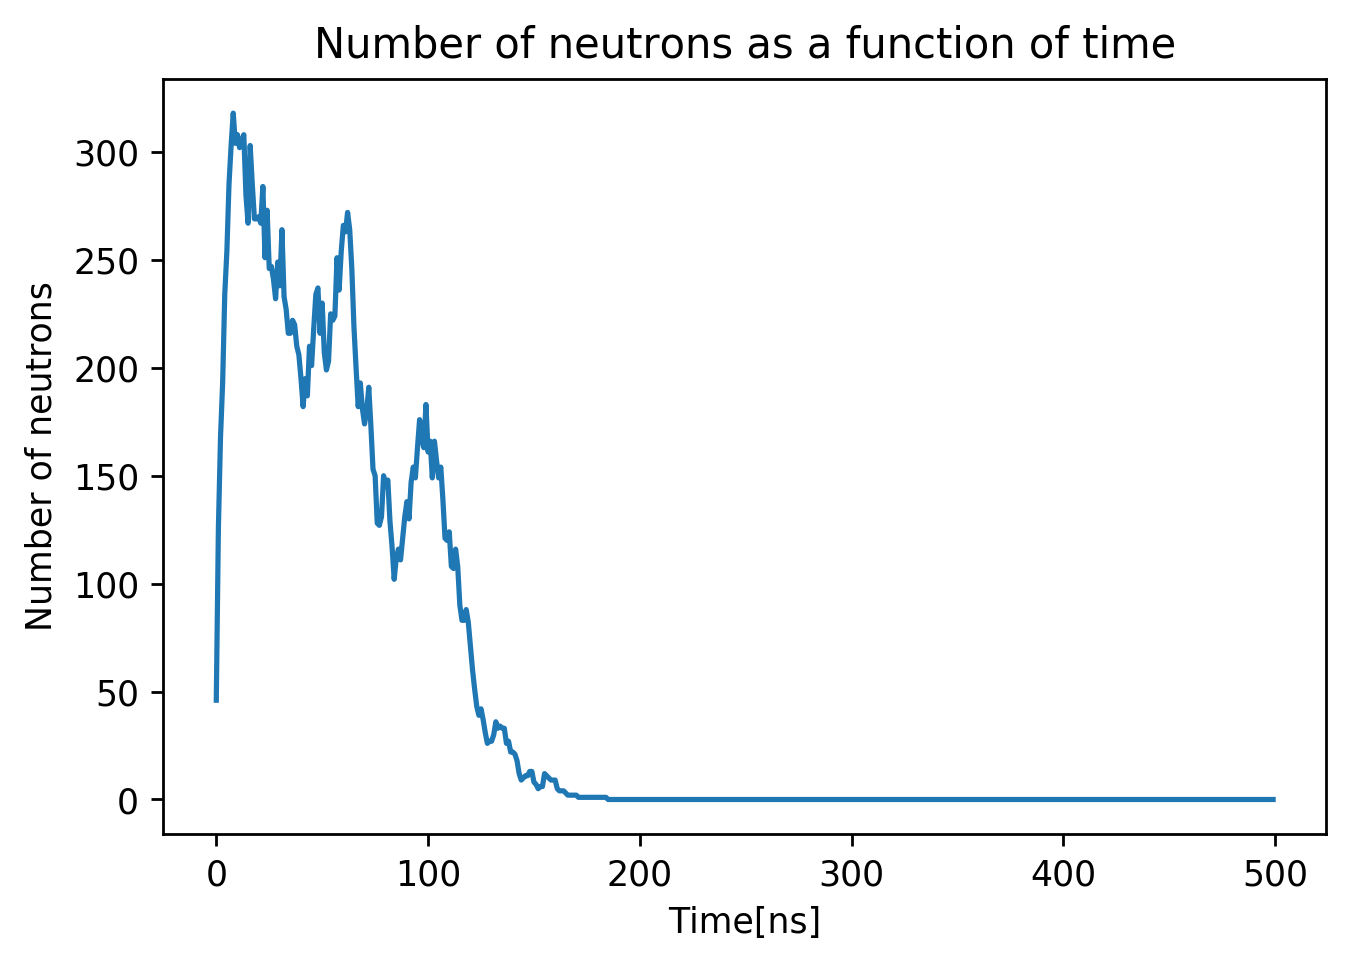

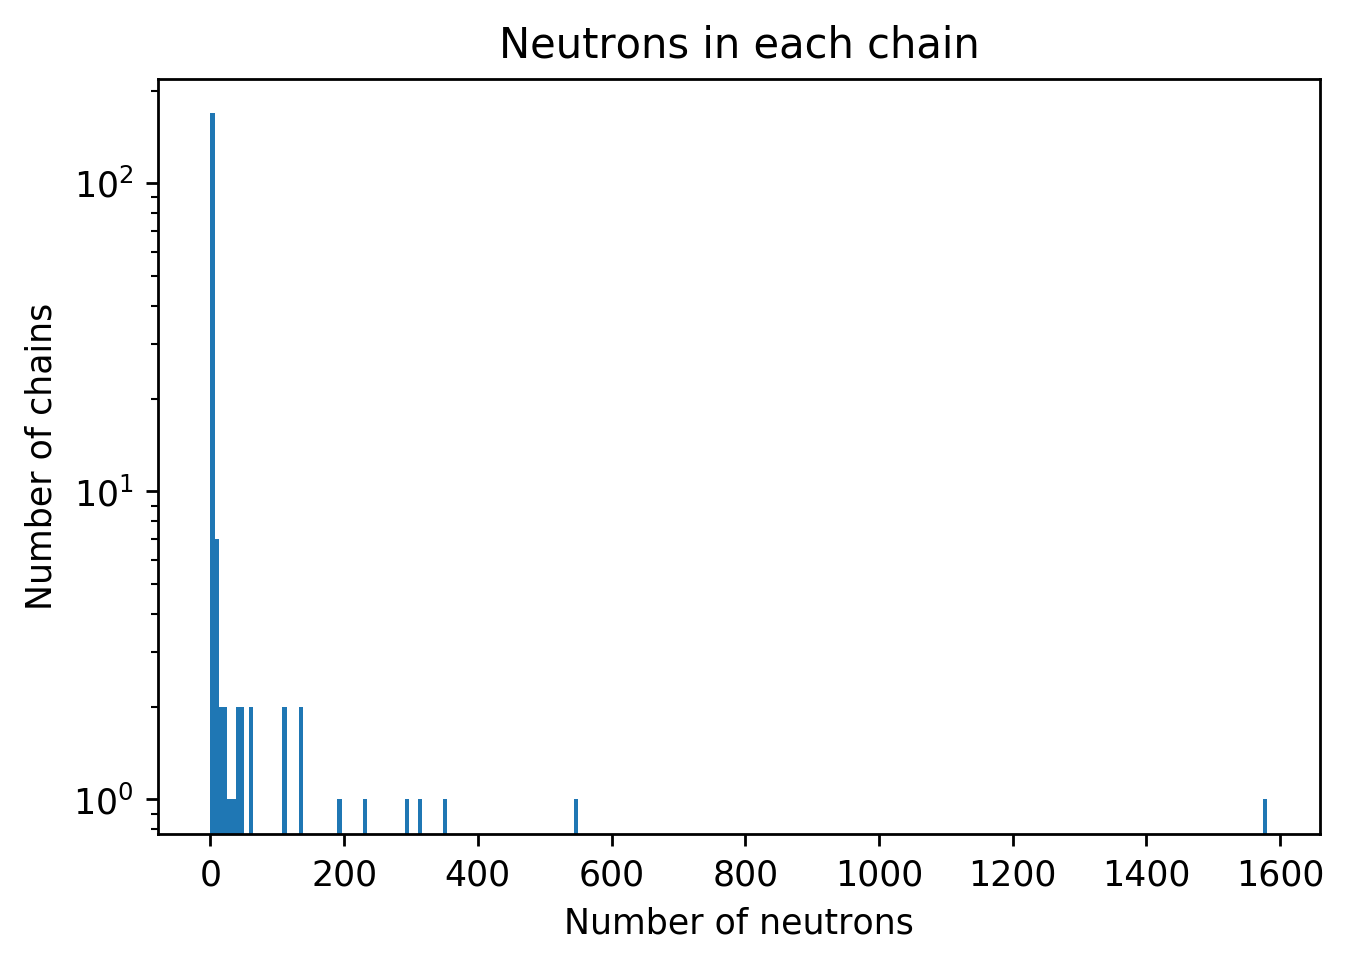

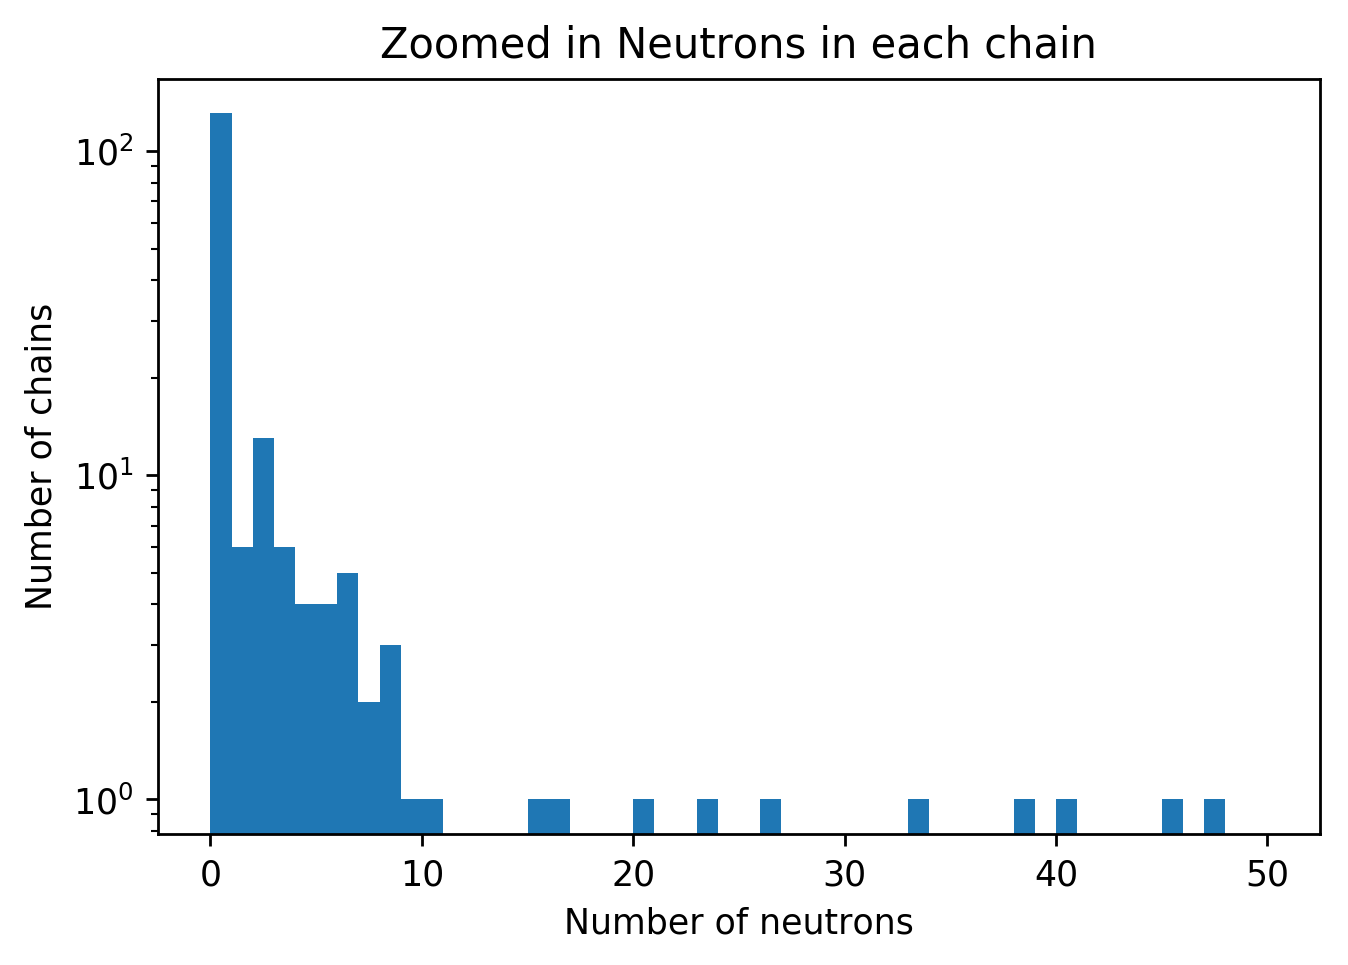

In [23]:
plt.figure()
plt.plot(trange,neutrons)
plt.title ('Number of neutrons as a function of time')
plt.xlabel('Time[ns]')
plt.ylabel('Number of neutrons')
plt.figure()
plt.hist(number,250)
plt.title("Neutrons in each chain")
plt.xlabel("Number of neutrons")
plt.ylabel("Number of chains")
plt.yscale('log')
plt.figure()
plt.hist(number,50,range=(0,50))
plt.title("Zoomed in Neutrons in each chain")
plt.xlabel("Number of neutrons")
plt.ylabel("Number of chains")
plt.yscale('log')
print('Number ofneutrons', np.sum(number))


In [24]:
One more step

SyntaxError: invalid syntax (<ipython-input-24-3fd86f855211>, line 1)

In [ ]:
geo.radius=10.8

exitPositions=[] # where neutrons leave the sphere
startPositions=[] #where mothers are generated
fissionPositions=[] #where fissions occur
number=[]  #number of neutrons


Neutron.output=False #turn off print statements

trange=np.arange(0,Neutron.maxTime, Neutron.timeBin)
neutrons=np.zeros(Neutron.numberOfBins)

for run in range(1,200):
#    pdb.set_trace()
    n.TrackNeutrons(10000000)
    startPositions.append(spherical(Neutron.firstNeutronStartPosition))
    count=0
    for i in range (0,Neutron.numberOfBins):
        for j in range(0,len(Neutron.list[i])):
            count+=1
            nn=Neutron.list[i][j]
            d=nn.nDaughters
            if 'escape' in d:
                exitPositions.append(spherical(Neutron.list[i][j].position))
            else:
                fissionPositions.append(spherical(Neutron.list[i][j].position))
            #now increment the neutrons versus time
            t1=int(nn.time0/Neutron.timeBin)
            t2=int(nn.time/Neutron.timeBin)+1
            if t1>=Neutron.numberOfBins:
                t1=Neutron.numberOfBins-1
            if t2>Neutron.numberOfBins:
                t2=Neutron.numberOfBins
            for t in range(t1,t2):
                neutrons[t]+=1
    
    number.append(count)
    if run%5 ==0:
        print('Run #',run)

#now we convert the lists into np arrays with rows corresponding to r, ctheta,phi
startPositions=np.array(startPositions).transpose()
exitPositions=np.array(exitPositions).transpose()
fissionPositions=np.array(fissionPositions).transpose()
number=np.array(number)


In [ ]:
plt.figure()
plt.plot(trange,neutrons)
plt.title ('Number of neutrons as a function of time')
plt.xlabel('Time[ns]')
plt.ylabel('Number of neutrons')
plt.figure()
plt.hist(number,250)
plt.title("Neutrons in each chain")
plt.xlabel("Number of neutrons")
plt.ylabel("Number of chains")
plt.yscale('log')
plt.figure()
plt.hist(number,50,range=(0,50))
plt.title("Zoomed in Neutrons in each chain")
plt.xlabel("Number of neutrons")
plt.ylabel("Number of chains")
plt.yscale('log')
print('Number of neutrons', np.sum(number))


## Comments

Notice that there are neutrons that behave very differently- some chains end up with 70000 neutrons in 500 ns, and others with 0 daughters.  The way that this can make sense is the coupling between geometry and interaction statistics- ie.  neutrons from the outside of the volume will always escape, no matter how big the sphere.  And some fraction of the neutrons end creating "0 daughter neutron" fissions.  But if we have a reaction that builds up sufficient neutrons statistically, we end up with enough neutrons to sample the configuration space.  If we have a critical mass that number of neutrons will exponentially grow.

Why does the neutron versus time graph turn over?  How would we test those hypotheses?

If we look calculate the mass of a 10 cm sphere of uranium, we get something like 78 kg as the critical mass.  If we look up the critical mass we find 58 kg.  Why are those numbers different?  

In reality, there are always a fraction of U238 in the mix.  U238 absorbs neutrons but does not fission.  It is straightforward to add this to our MC, but that doesn't add any new computational aspects to the problem, but will increase the mass necessary to achieve criticality.

For a nuclear reactor, one typically doesn't use critical mass or fast neutron fissions, which are hard to control. Instead we surround the uranium with water or graphite- heavy water has elastic scattering and very little absorption- light water has somewhat more neutron absorption.  These "moderators" slow the neutrons down and, if we look at the cross sections, there is a huge increase in fission cross sections for low energies. The neutrons scatter back into the uranium and cause fissions.   We could modify the geometry in our program to do this in a straightforward way, and actually figure out an optimum geometry of uranium/water.  Note that heavy water allows a natural uranium (0.72% U235) fuel. 

Where do the initial neutrons comes from?



